# Python Final Project: Bike Sharing Prediction
## Group 7: Conrad Lee, Derek Perkinson, Felix Krueger, Kei Ichikawa, Martin Louzada, Vanessa Lopez Garcia


### Introduction

	The goal of this assignment is to predict the total count of bike rentals during each hour. This notebook explains how we can explore and prepare the data for model building. For this purpose, we have structured the project into the following steps:
    
1.	Data Summary


2.	Feature Engineering: Part I


3.	Missing Value Analysis


4.	Exploratory data analysis 


5.	Outlier Analysis


6.	Correlation Analysis


7. Feature Engineering: Part II


10.	Linear Regression Model


11.	Decision Tree


12.	Random Forest Regression


13.	XGBoost



In [1]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# load dataset and set "instant" as index column
df_hour = pd.read_csv("hour.csv", index_col="instant")
df_hour.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


# 1.	Data Summary

Size of the dataset and type of variables present in our data.

In [4]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17379 entries, 1 to 17379
Data columns (total 16 columns):
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 2.3+ MB


# 2.	Feature Engineering: Part I

After having a look at the Data Summary results, we observed that the columns "season", "holiday", "workingday", "weather", “weekday”, “weathersit”, “mnth”, “yr”, “hr” should be of "categorical" data type. Therefore, we transform the dataset in the following ways to start the EDA process:
- Date-time conversion.
- Coerce the datatype of "season","holiday","workingday", “weather “, “weekday”, “weathersit”, “mnth”, “yr” and “hr” to category.

In [5]:
# set appropriate variable types
# date time conversion
df_hour["dteday"] = pd.to_datetime(df_hour.dteday)

# categorical variables
df_hour["season"] = df_hour.season.astype("category")
df_hour["holiday"] = df_hour.holiday.astype("category")
df_hour["weekday"] = df_hour.weekday.astype("category")
df_hour["weathersit"] = df_hour.weathersit.astype("category")
df_hour["workingday"] = df_hour.workingday.astype("category")
df_hour["mnth"] = df_hour.mnth.astype("category")
df_hour["yr"] = df_hour.yr.astype("category")
df_hour["hr"] = df_hour.hr.astype("category")

In [6]:
df_hour.describe()

,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


# 3.	Missing Value Analysis

Next step was to find out whether we have any missing values in our data. Luckily we dont have any missing value in the dataset. 

In [7]:
# check for missing values
df_hour.isna().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

# 4. Exploratory Data Analysis

In [6]:
# Configuring plotting visual and sizes
sns.set_style("whitegrid")
sns.set_context("talk")
params = {
    "legend.fontsize": "x-large",
    "figure.figsize": (30, 10),
    "axes.labelsize": "x-large",
    "axes.titlesize": "x-large",
    "xtick.labelsize": "x-large",
    "ytick.labelsize": "x-large",
}

plt.rcParams.update(params)

[Text(0.5,1,'Bike sharing demand over time')]

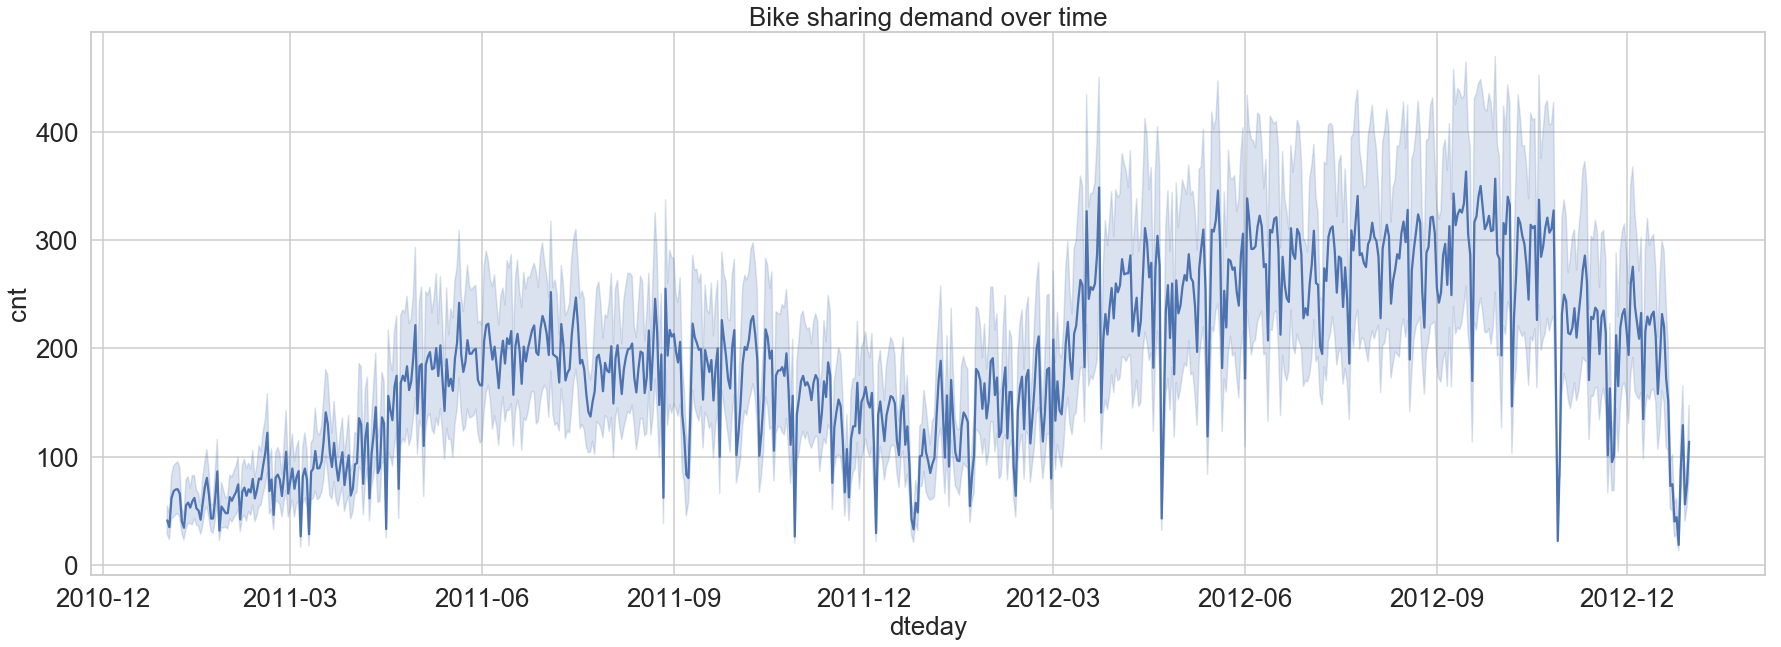

In [134]:
#Time Series plot
ax = sns.lineplot(x="dteday", y="cnt", data=df_hour)
ax.set(title="Bike sharing demand over time")

###  Visualizing Distribution of the data

[Text(0.5,1,'Counts variable distribution')]

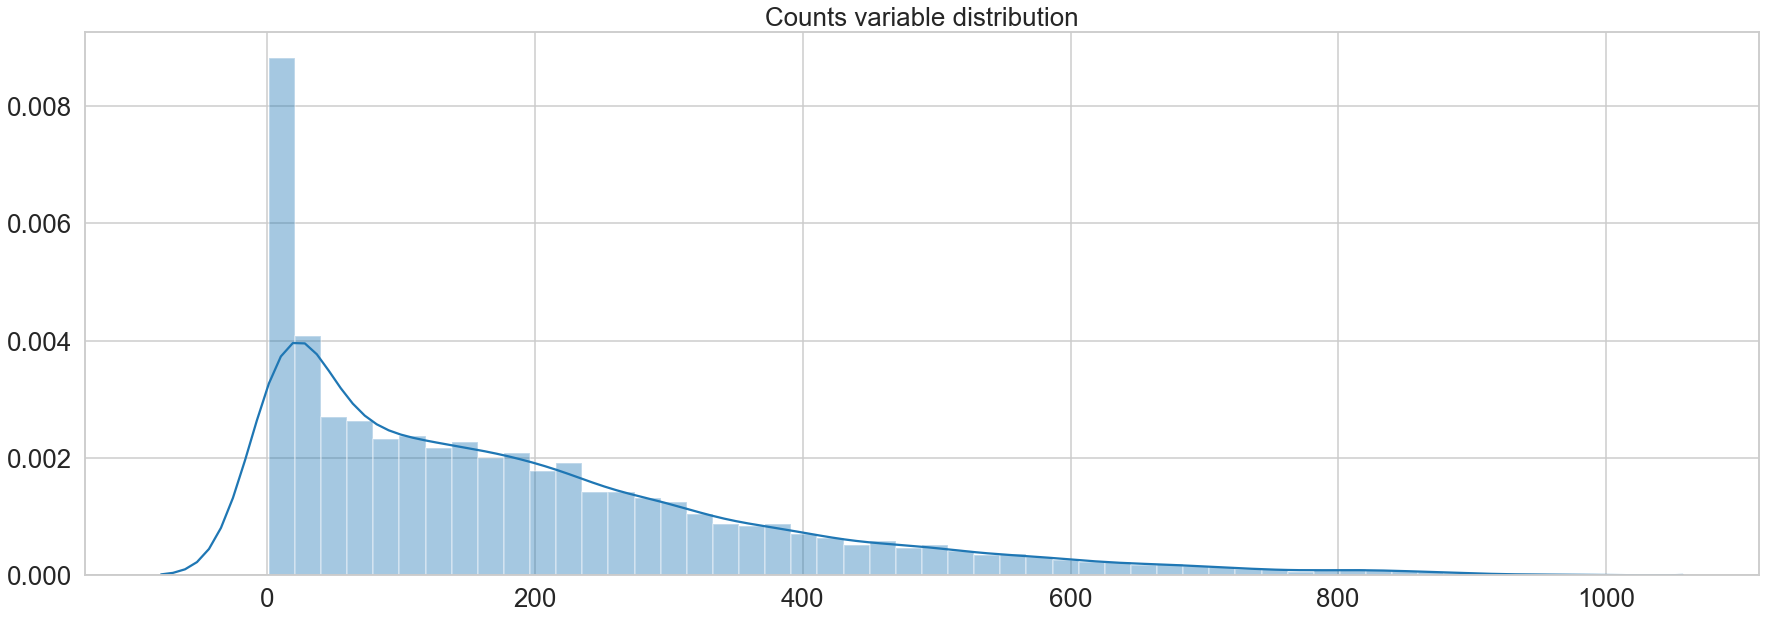

In [10]:
# target variable distribution
fig, ax = plt.subplots()
sns.distplot(df_hour[["cnt"]])
ax.set(title="Counts variable distribution")

The distribution of counts is very skewed to the right, with a big concentration of lower values.

[Text(0.5,1,'Temperature distribution')]

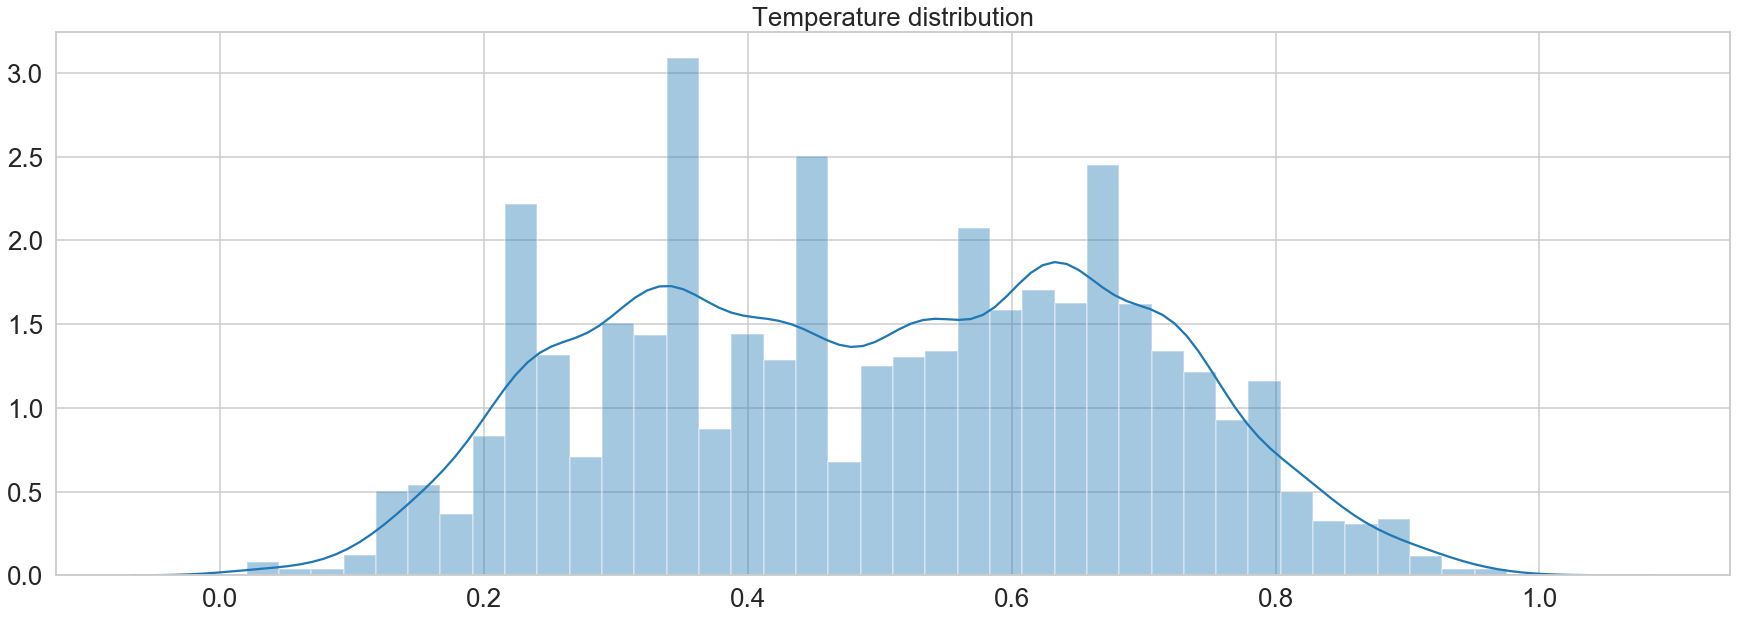

In [14]:
# temperature distribution
fig, ax = plt.subplots()
sns.distplot(df_hour[["temp"]])
ax.set(title="Temperature distribution")

[Text(0.5,1,'Humidity distribution')]

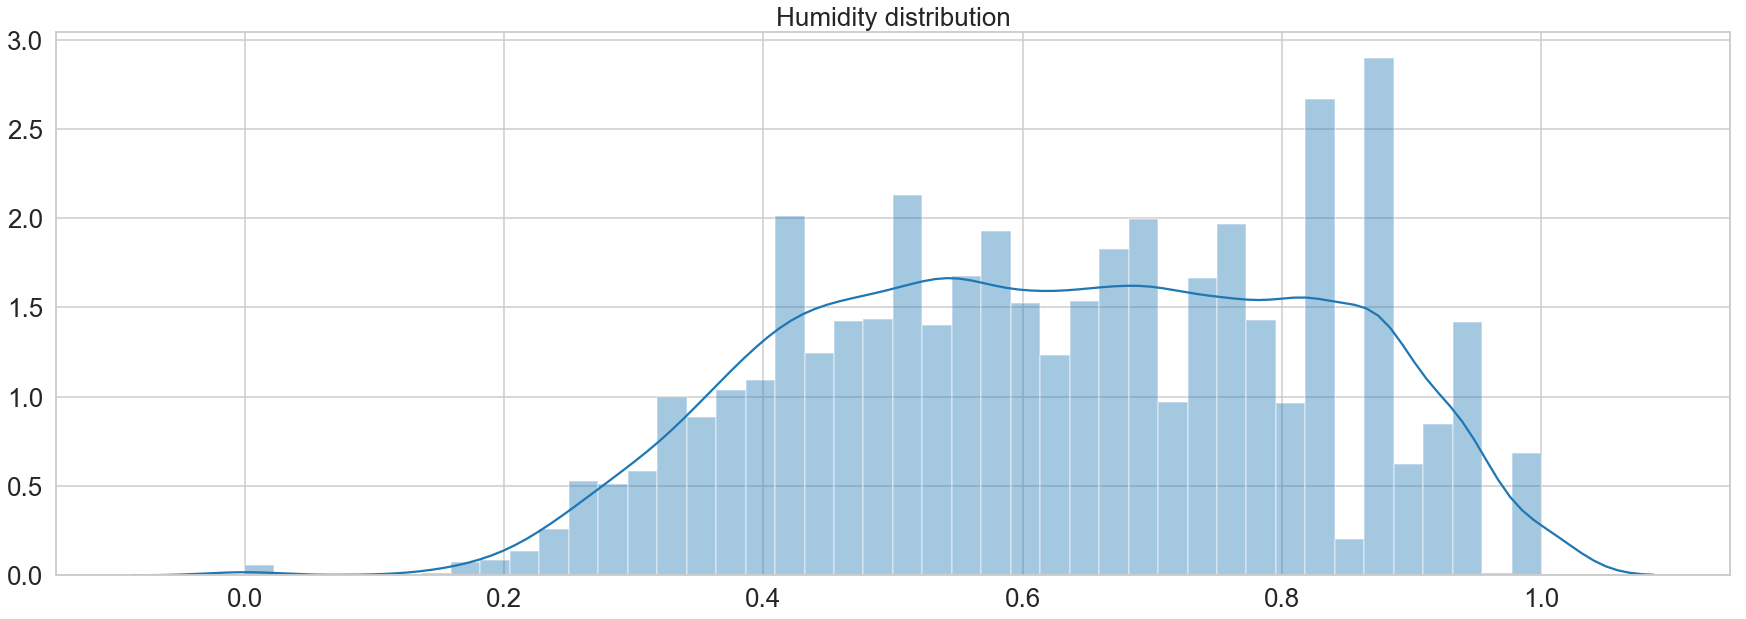

In [16]:
# Humidity distribution
fig, ax = plt.subplots()
sns.distplot(df_hour[["hum"]])
ax.set(title="Humidity distribution")

[Text(0.5,1,'Windspeed distribution')]

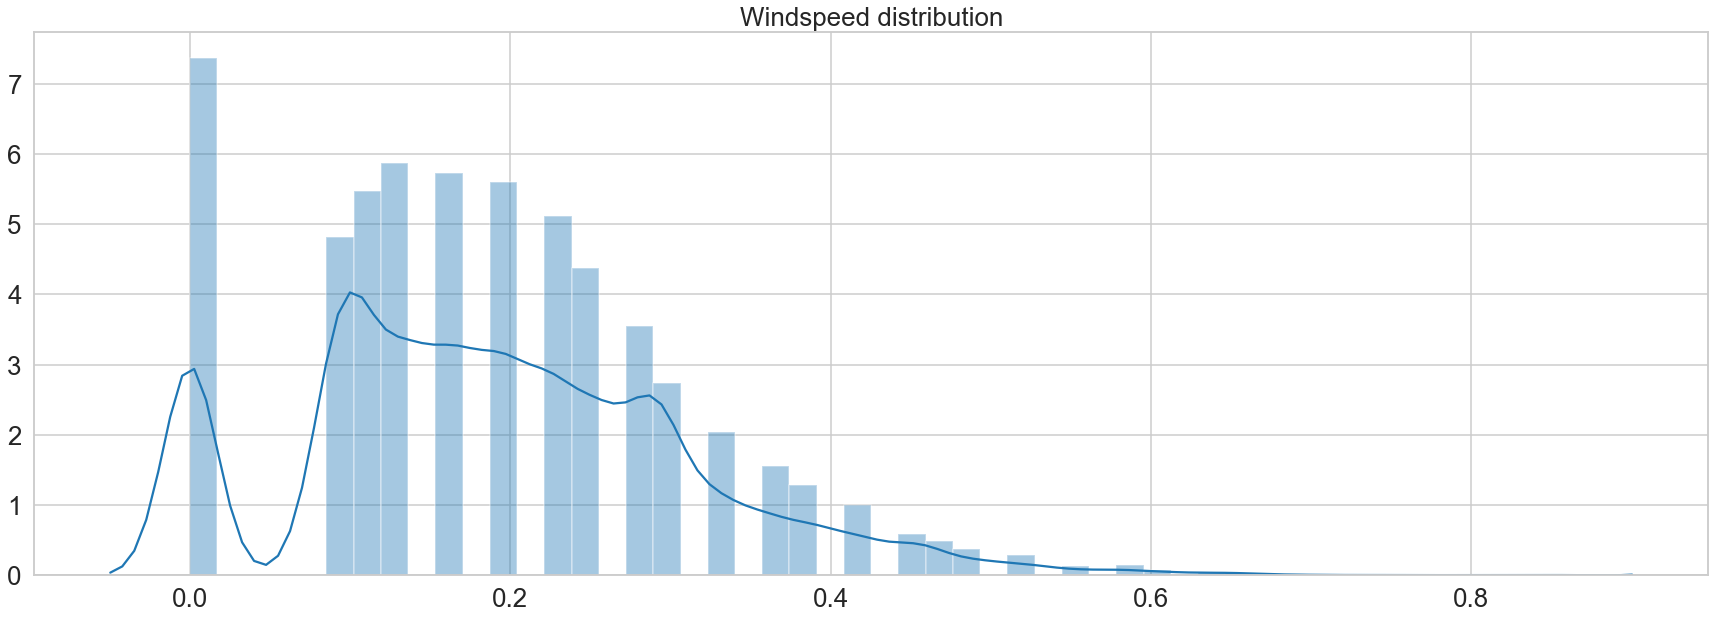

In [17]:
# Windspeed distribution
fig, ax = plt.subplots()
sns.distplot(df_hour[["windspeed"]])
ax.set(title="Windspeed distribution")

0.2173633989078211


[Text(0.5,1,'Windspeed distribution')]

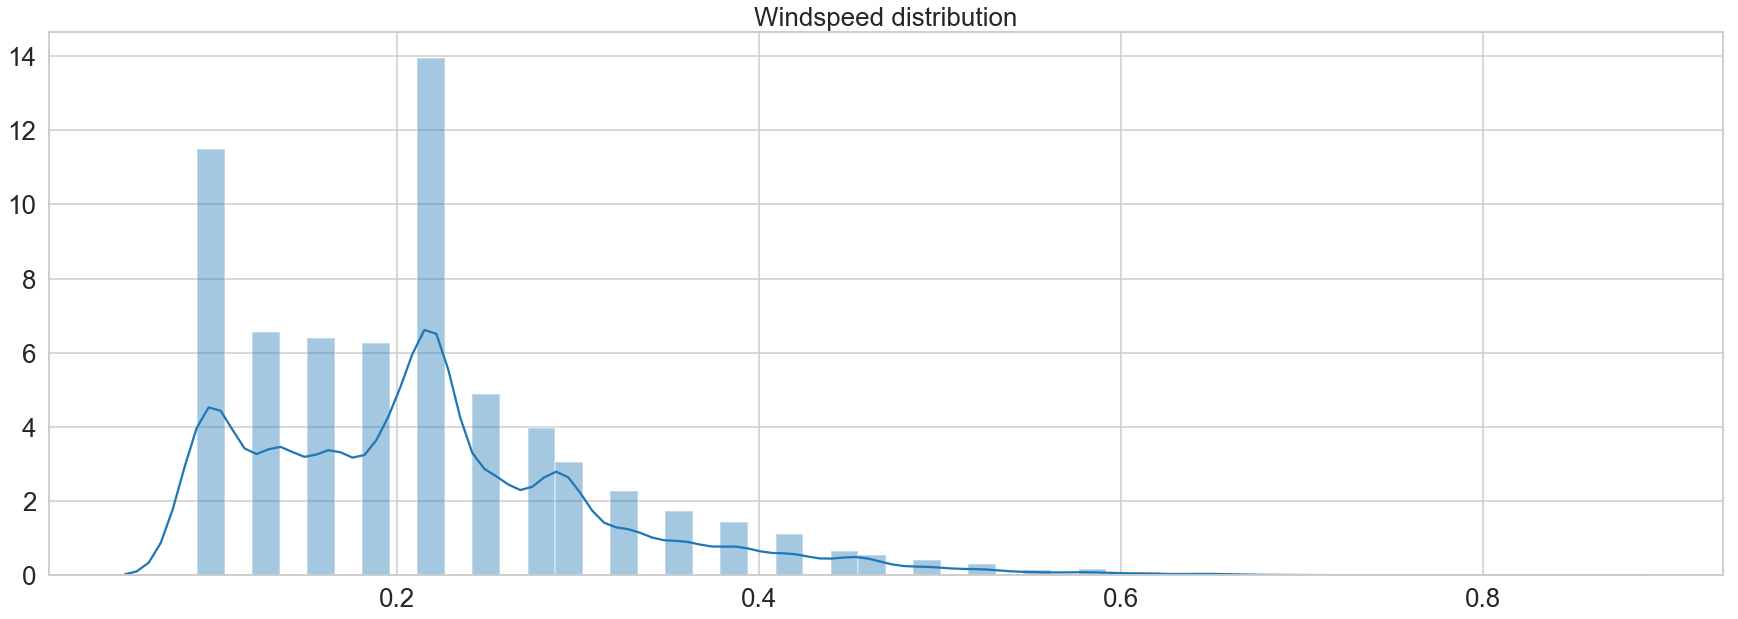

In [22]:
mean_windspeed = df_hour[df_hour["windspeed"] != 0]["windspeed"].mean(skipna=True)
print(mean_windspeed)
df_hour["windspeed"] = df_hour.windspeed.mask(df_hour.windspeed == 0,mean_windspeed)
fig, ax = plt.subplots()
sns.distplot(df_hour[["windspeed"]])
ax.set(title="Windspeed distribution")

### Visualizing Count Vs year

[Text(0.5,1,'Counts in 2011 and 2012')]

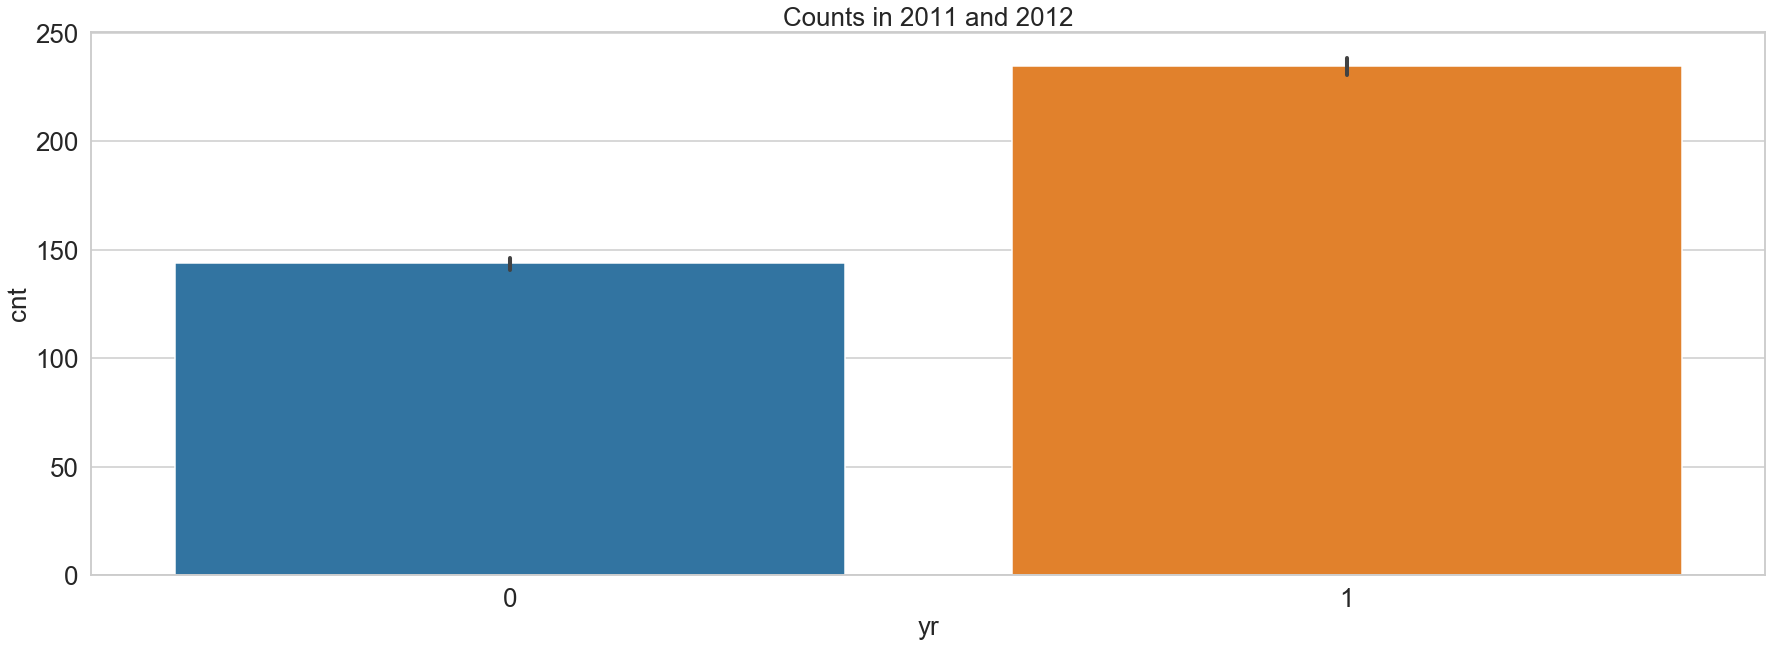

In [11]:
# check count in each year
fig, ax = plt.subplots()
sns.barplot(data=df_hour[["yr", "cnt"]], x="yr", y="cnt", ax=ax)
ax.set(title="Counts in 2011 and 2012")

There was a big increase in demand from 2011 to 2012.

### Visualizing Count Vs month

[Text(0.5,1,'Monthly distribution of counts')]

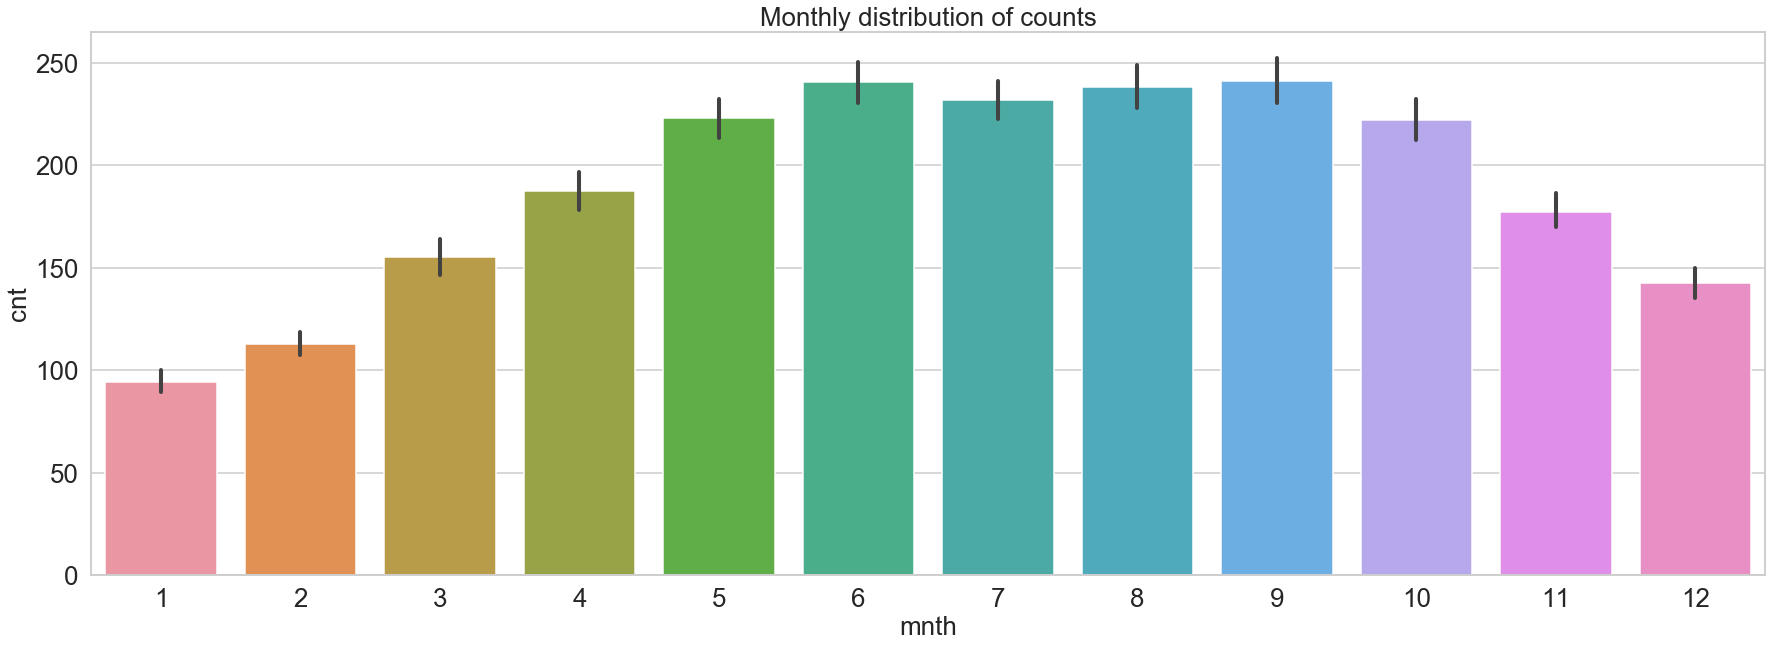

In [12]:
# check distribution of count per month
fig, ax = plt.subplots()
sns.barplot(data=df_hour[["mnth", "cnt"]], x="mnth", y="cnt", ax=ax)
ax.set(title="Monthly distribution of counts")

Demand is higher from May to October.

### Visualizing hour distribution of count Vs month

[Text(0.5,1,'Hourly distribution of counts per month')]

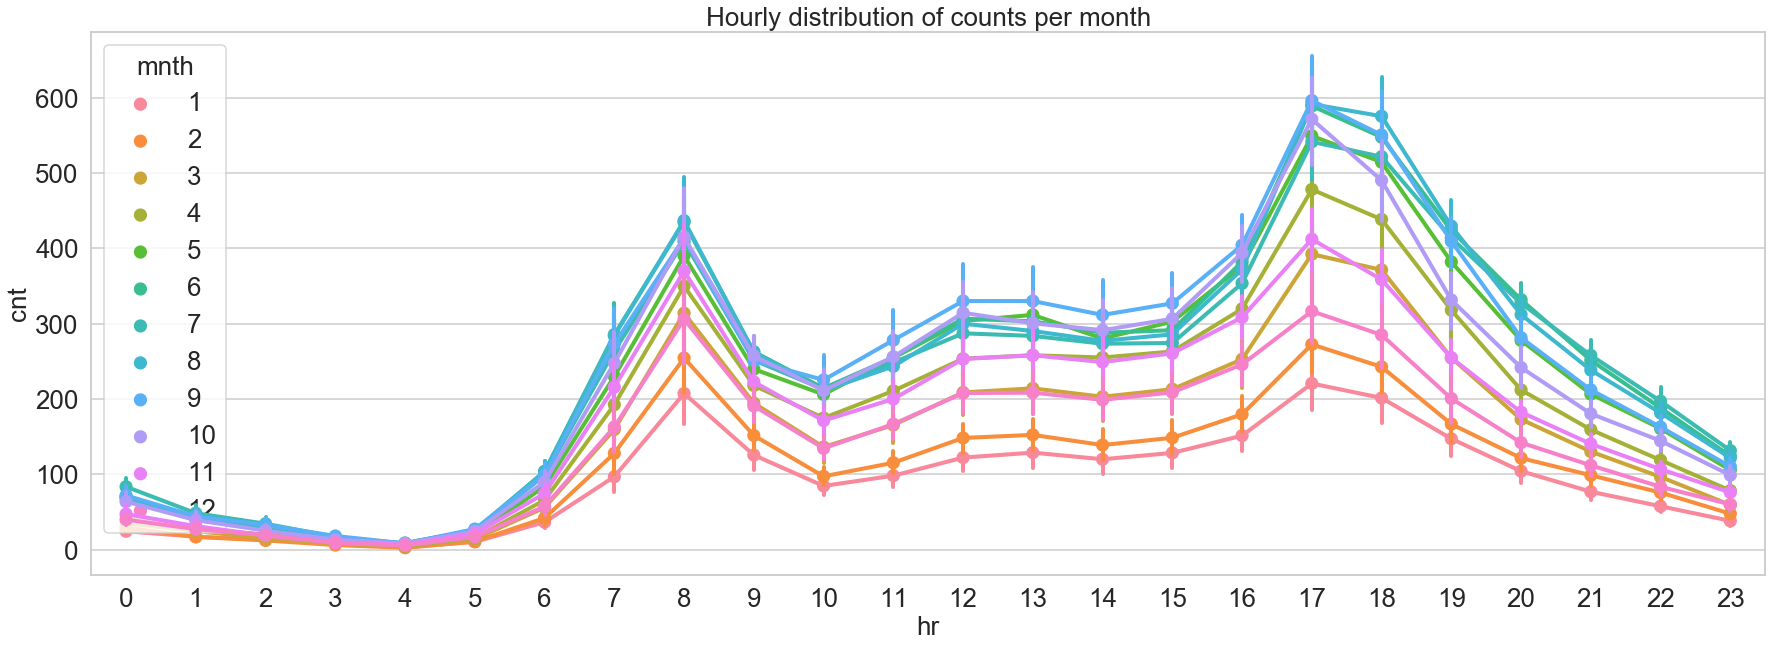

In [13]:
fig, ax = plt.subplots()
sns.pointplot(data=df_hour[["hr", "cnt", "mnth"]], x="hr", y="cnt", hue="mnth", ax=ax)
ax.set(title="Hourly distribution of counts per month")

### Visualizing Count Vs season

[Text(0.5,1,'Seasonal distribution of counts')]

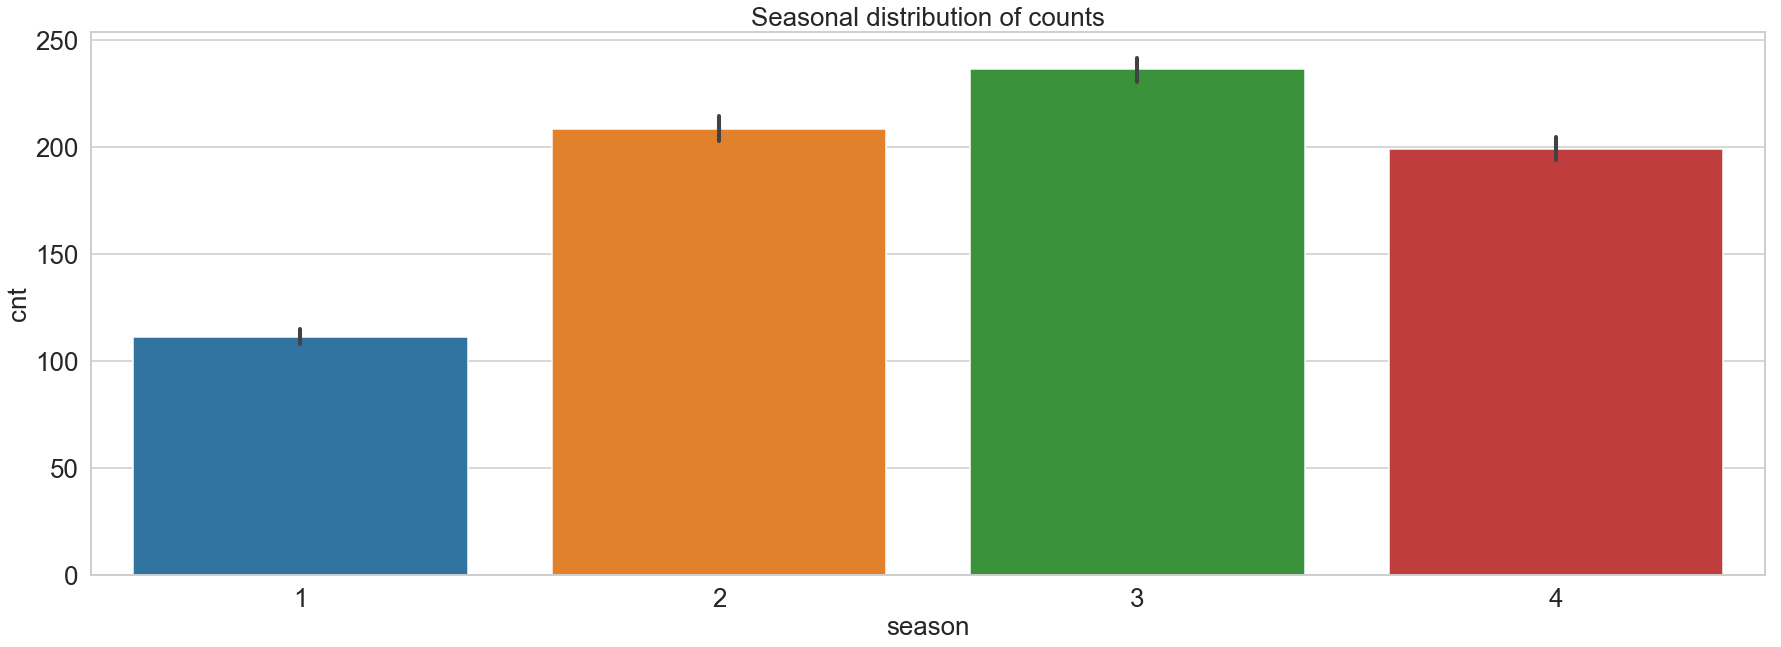

In [14]:
# check count distribution per season
fig, ax = plt.subplots()
sns.barplot(data=df_hour[["season", "cnt"]], x="season", y="cnt", ax=ax)
ax.set(title="Seasonal distribution of counts")

Winter(1) is the season with lowest demand, while the other 3 are somewhat similar.

### Visualizing hour distribution Count Vs season

[Text(0.5,1,'Season wise hourly distribution of counts')]

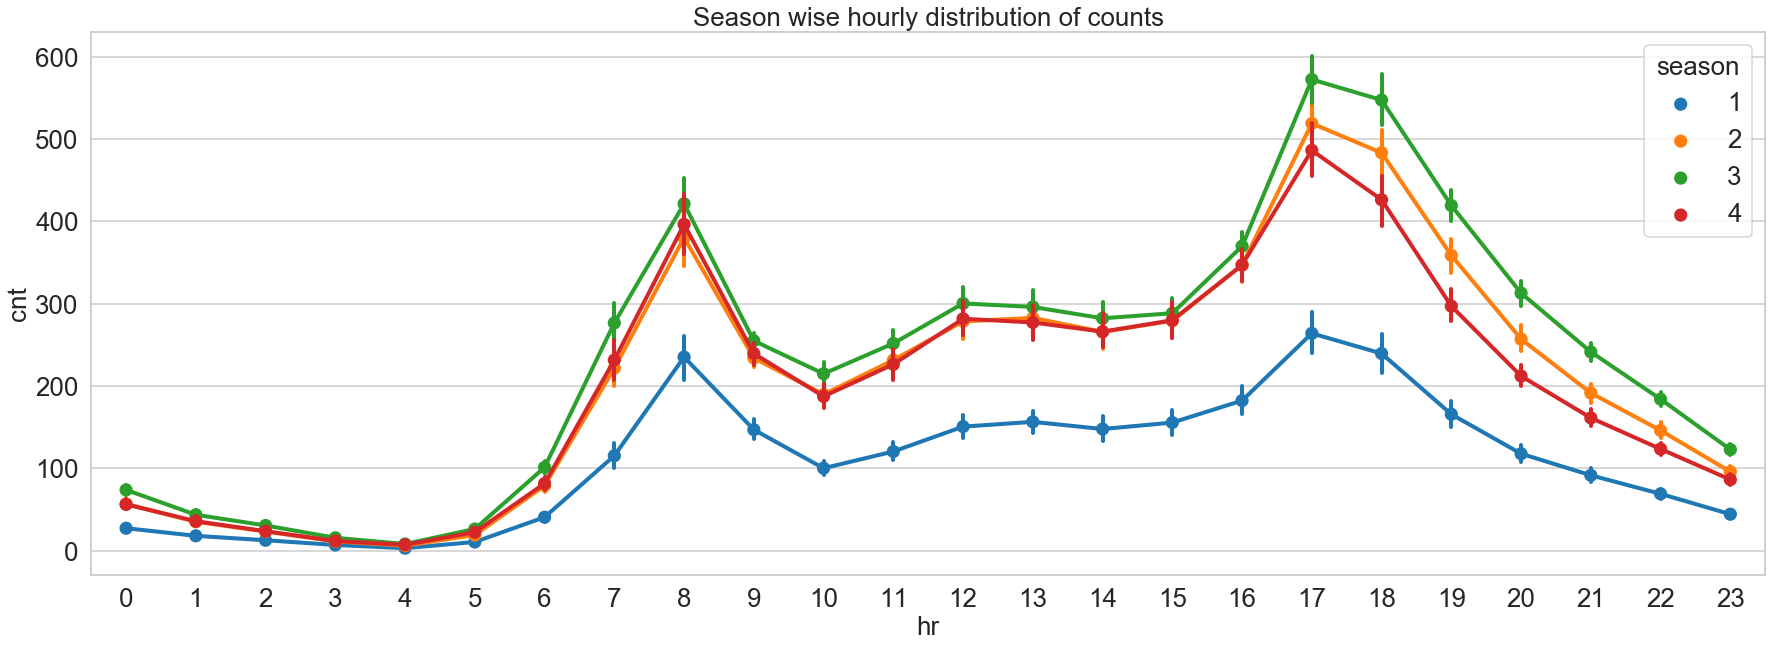

In [15]:
fig, ax = plt.subplots()
sns.pointplot(
    data=df_hour[["hr", "cnt", "season"]], x="hr", y="cnt", hue="season", ax=ax
)
ax.set(title="Season wise hourly distribution of counts")

We see in the chart that the trend in the distribution of count per hour remains the same accross all seasons, with peaks at around 8am and 17-18pm.

### Visualizing Count distribution Vs weekday

[Text(0.5,1,'Daily distribution of counts')]

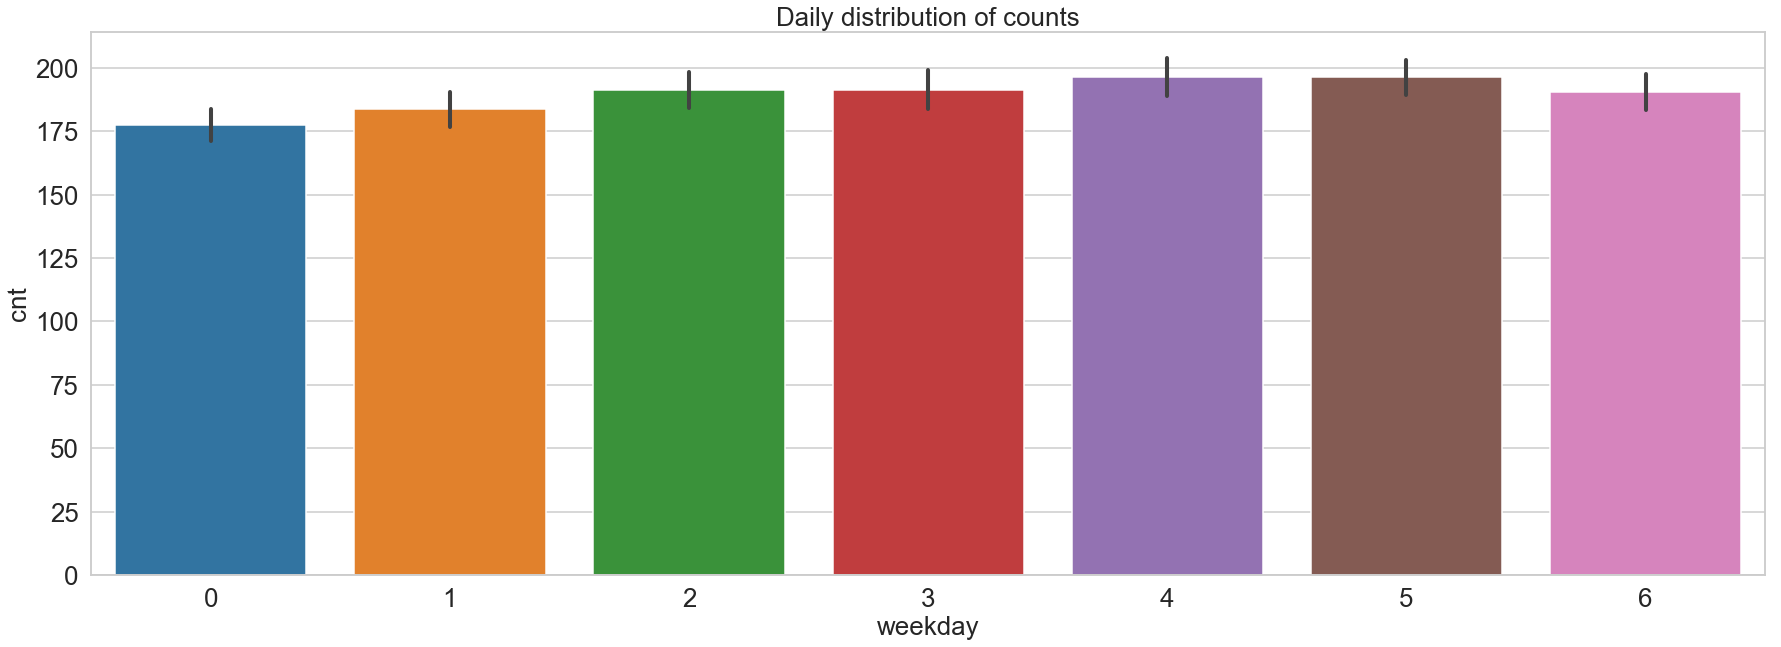

In [16]:
# check count distribution per weekday
fig, ax = plt.subplots()
sns.barplot(data=df_hour[["weekday", "cnt"]], x="weekday", y="cnt", ax=ax)
ax.set(title="Daily distribution of counts")

Demand is similar in all seven days of the week.

### Visualizing hour distribution of Count Vs weekday

[Text(0.5,1,'Weekday wise hourly distribution of counts')]

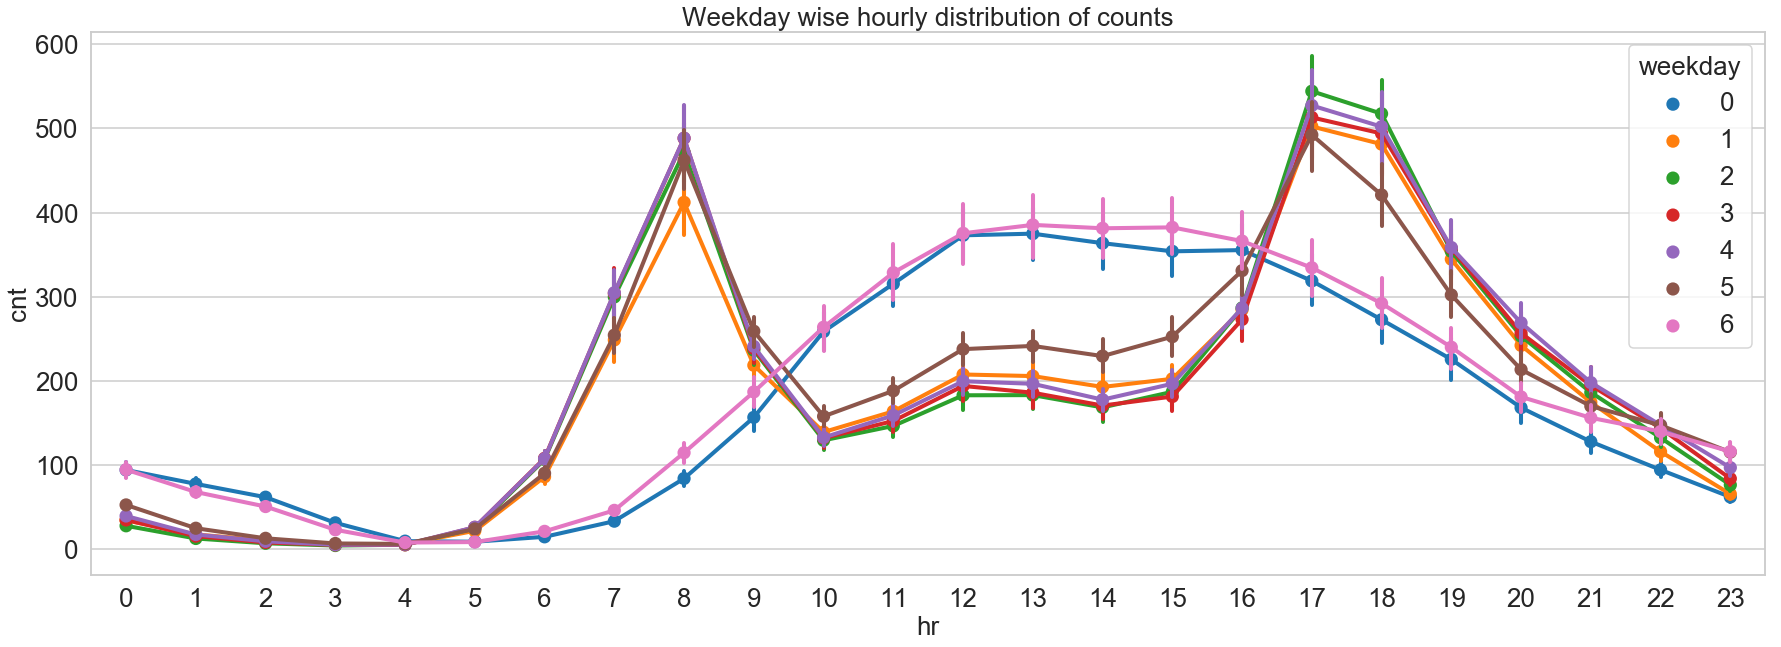

In [17]:
fig, ax = plt.subplots()
sns.pointplot(
    data=df_hour[["hr", "cnt", "weekday"]], x="hr", y="cnt", hue="weekday", ax=ax
)
ax.set(title="Weekday wise hourly distribution of counts")

We can spot in the charts that the peak hours are reversed for Saturday and Sunday, when most of the demand occurs from 10am to 16pm, as opposed to weekdays, where demand peaks at 8am an 17-18pm.

### Visualizing Count distribution in working day Vs holidays/weekends

[Text(0.5,1,'Distribution of counts is working vs non-working days')]

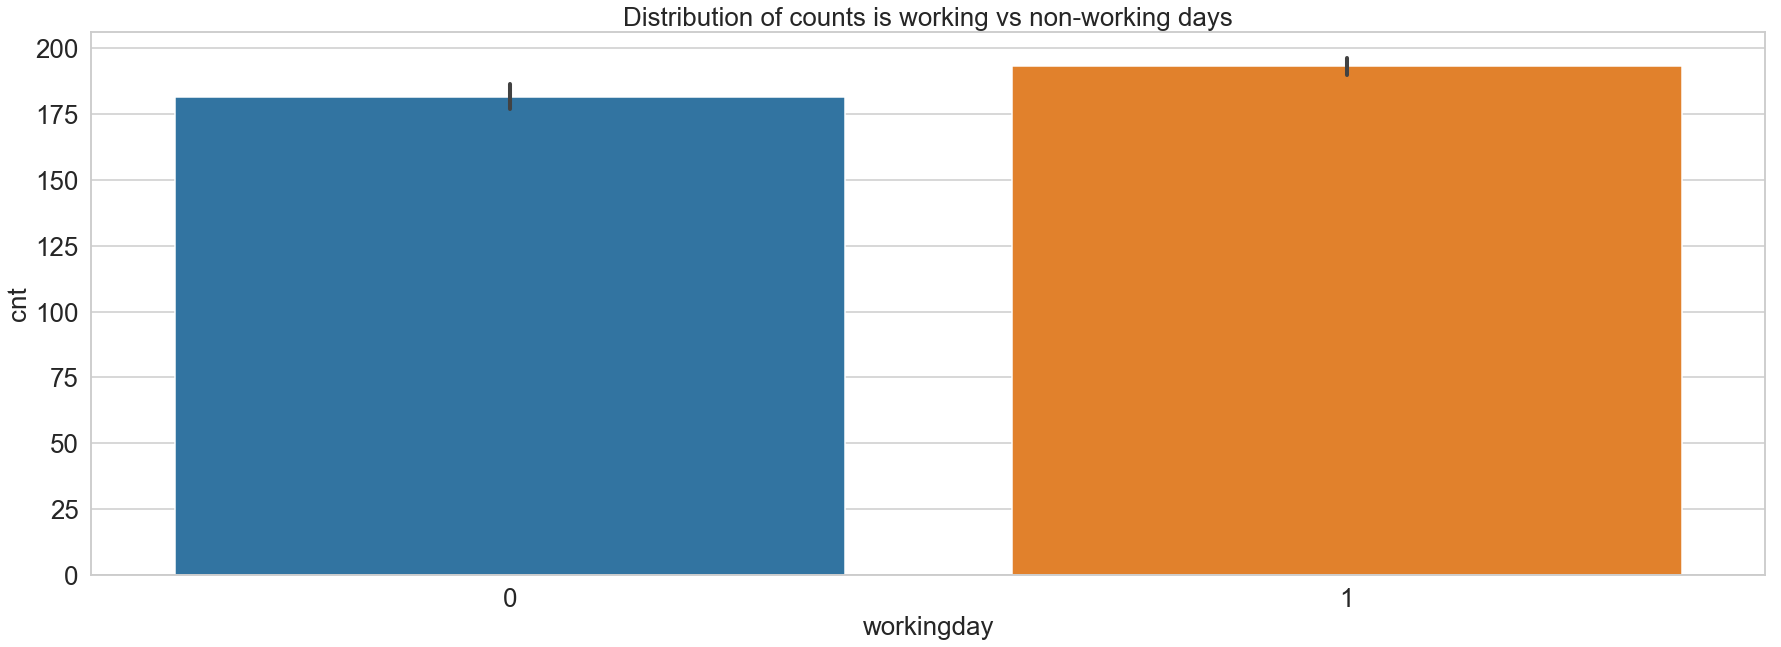

In [18]:
fig, ax = plt.subplots()
sns.barplot(data=df_hour[["workingday", "cnt"]], x="workingday", y="cnt", ax=ax)
ax.set(title="Distribution of counts is working vs non-working days")

Counts are slightly higher in working days.

### Visualizing hour distribution of count Vs non-working weekday

[Text(0.5,1,'Working vs non-working days hourly distribution of counts')]

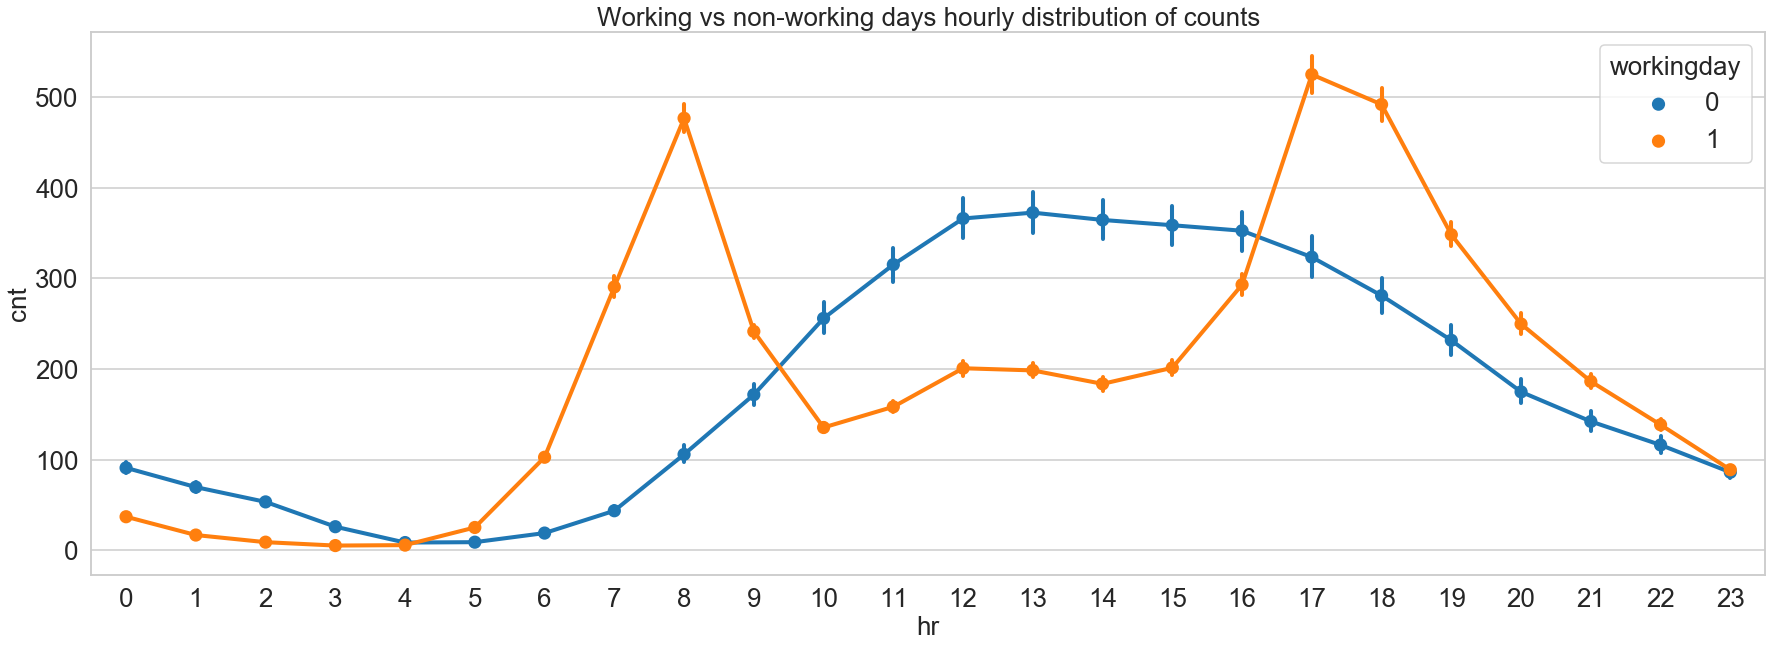

In [19]:
fig, ax = plt.subplots()
sns.pointplot(
    data=df_hour[["hr", "cnt", "workingday"]], x="hr", y="cnt", hue="workingday", ax=ax
)
ax.set(title="Working vs non-working days hourly distribution of counts")

As seen previously, peak hours are reversed for working and non working days, the first peaking at 8am and 17-18pm and the latter with higher demand from 10am to 16pm. 

### Visualizing Count distribution Vs weather situation

[Text(0,0,'1: Clear'),
 Text(0,0,'2: Mist'),
 Text(0,0,'3: Light Snow'),
 Text(0,0,'4: Heavy Rain')]

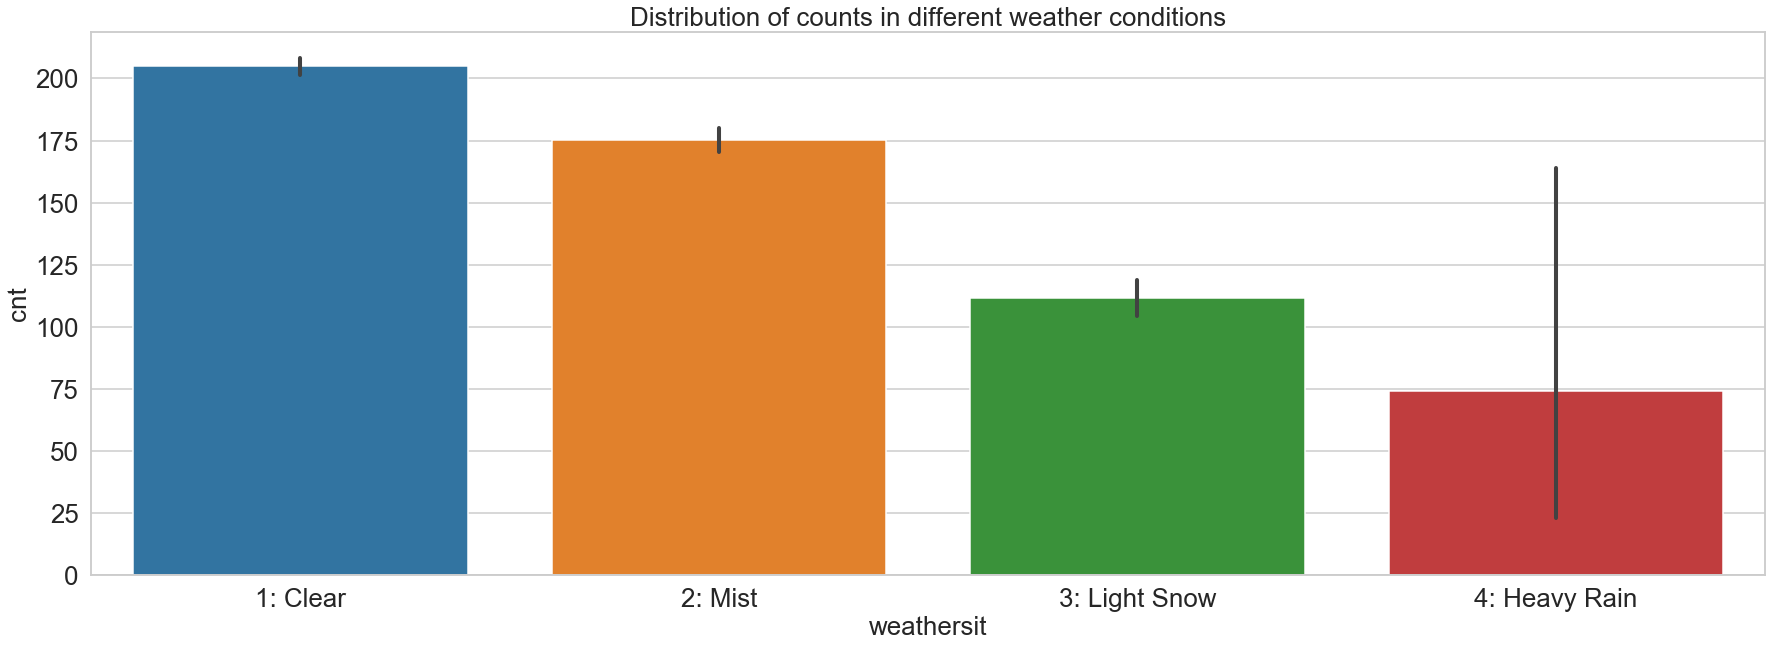

In [12]:
fig, ax = plt.subplots()
sns.barplot(data=df_hour[["weathersit", "cnt"]], x="weathersit", y="cnt", ax=ax)
ax.set(title="Distribution of counts in different weather conditions")
ax.set_xticklabels(['1: Clear','2: Mist','3: Light Snow','4: Heavy Rain'])

As expected, the better the weather conditions, the more bikes are rented by users.

### Visualizing Count distribution Vs different weather conditions

[Text(0.5,1,'Hourly distribution of counts according to weather situation')]

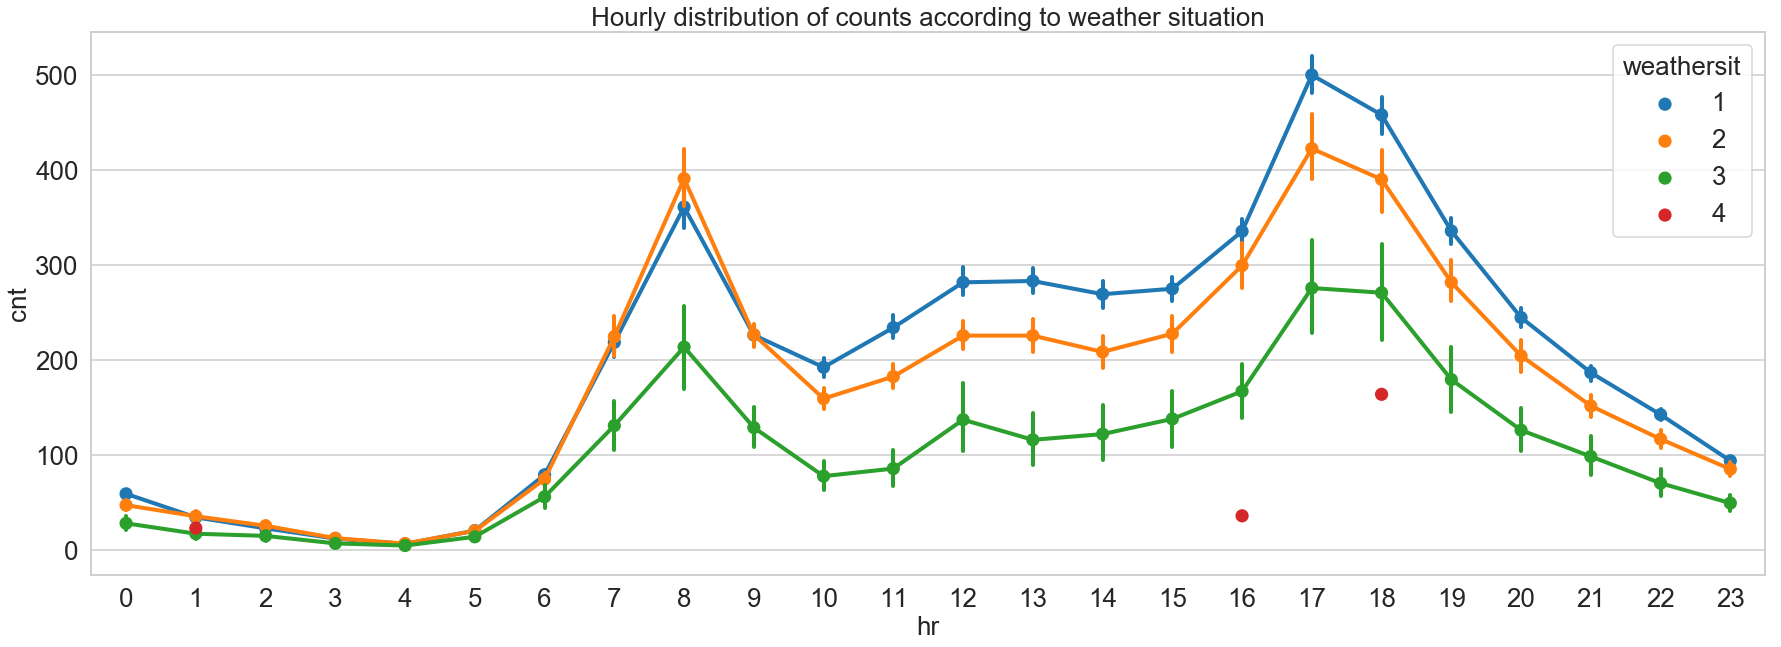

In [13]:
fig, ax = plt.subplots()
sns.pointplot(
    data=df_hour[["hr", "cnt", "weathersit"]], x="hr", y="cnt", hue="weathersit", ax=ax
)
ax.set(title="Hourly distribution of counts according to weather situation")

At first look, "count" variable contains lot of outliers which skews the distribution to the right.

### Visualizing Count Vs windspeed and humidity since they present outliers.

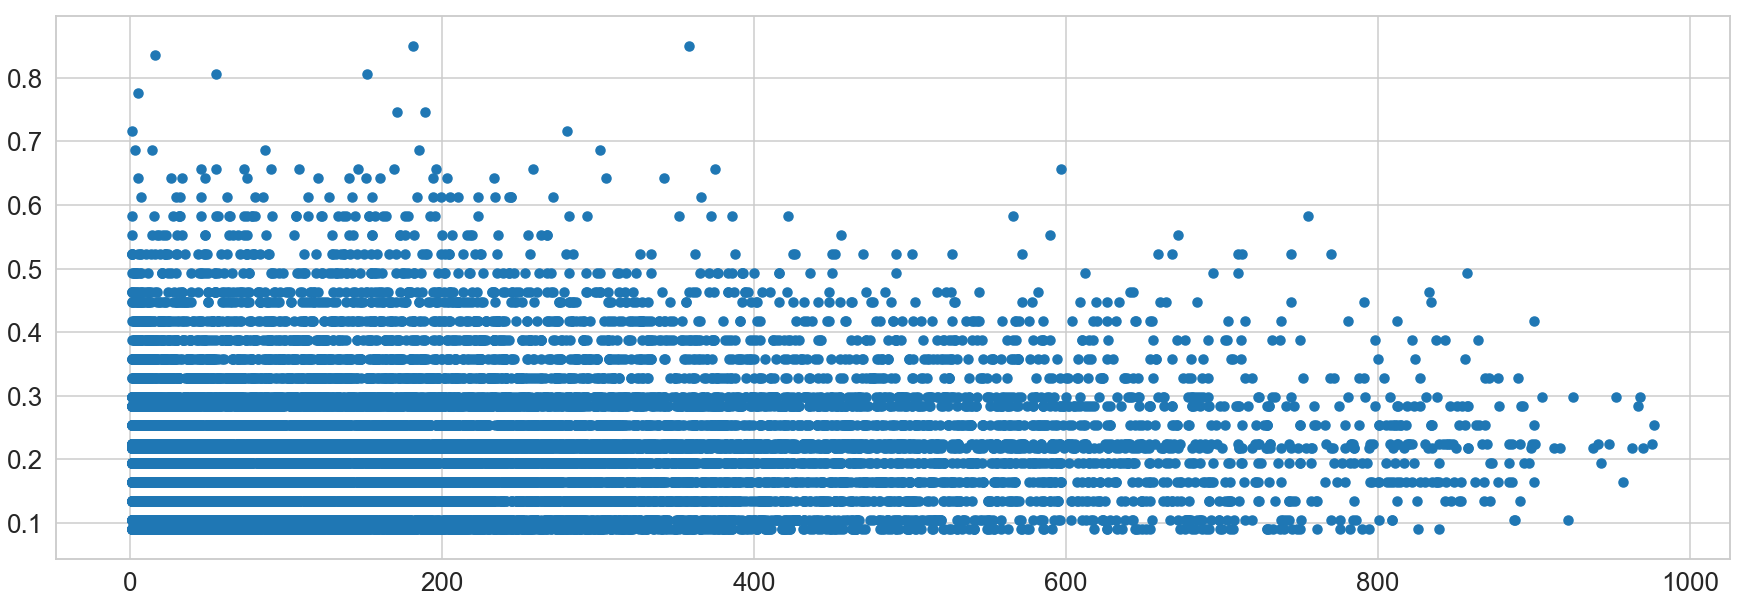

In [29]:
plt.scatter(df_hour.cnt, df_hour.windspeed)
plt.show()


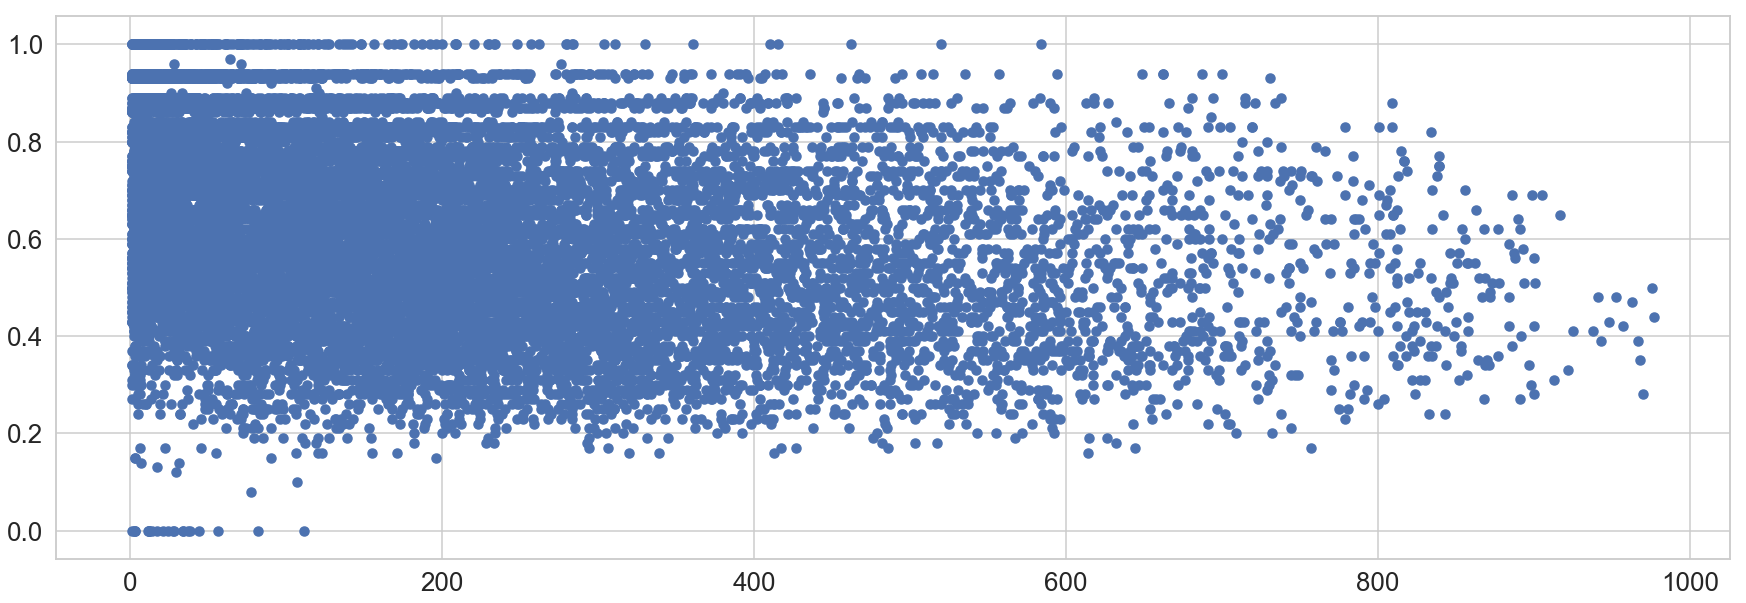

In [120]:
plt.scatter(df_hour.cnt, df_hour.hum)
plt.show()

# 5. Outlier Analysis

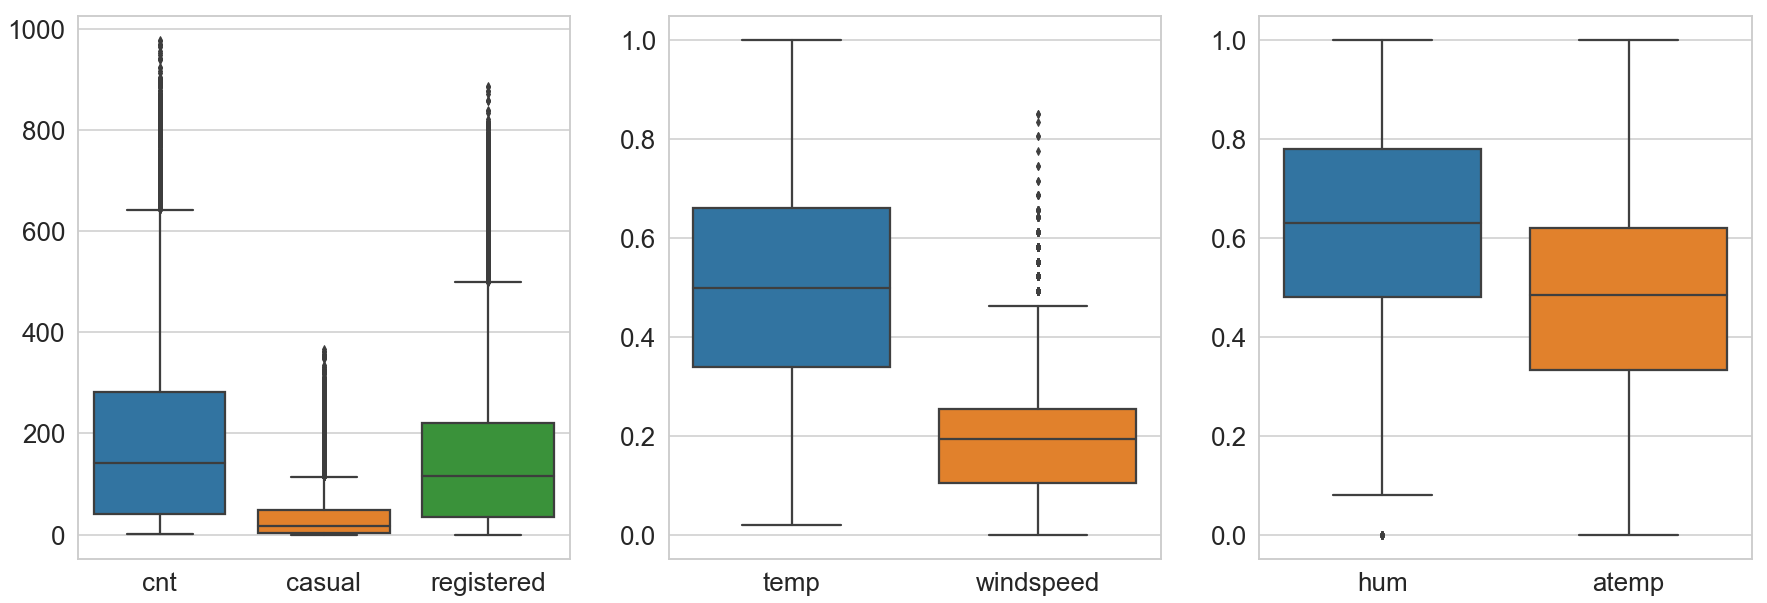

In [3]:
sns.set_style('whitegrid')
sns.set_context('talk')
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}

plt.rcParams.update(params)

fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
sns.boxplot(data=df_hour[['cnt',
                          'casual',
                          'registered']],ax=ax1)
sns.boxplot(data=df_hour[['temp',
                          'windspeed']],ax=ax2)
sns.boxplot(data=df_hour[['hum', 'atemp']],ax=ax3)



# 6. Correlation Analysis

In [30]:
#correlations
corrMatt = df_hour[['temp',
                    'atemp', 
                    'hum', 
                    'windspeed', 
                    'casual', 
                    'registered', 
                    'cnt']].corr()
corrMatt

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.987672,-0.069881,-0.039144,0.459616,0.335361,0.404772
atemp,0.987672,1.000000,-0.051918,-0.068131,0.454080,0.332559,0.400929
hum,-0.069881,-0.051918,1.000000,-0.280111,-0.347028,-0.273933,-0.322911
windspeed,-0.039144,-0.068131,-0.280111,1.000000,0.074646,0.061390,0.071517
casual,0.459616,0.454080,-0.347028,0.074646,1.000000,0.506618,0.694564
registered,0.335361,0.332559,-0.273933,0.061390,0.506618,1.000000,0.972151
cnt,0.404772,0.400929,-0.322911,0.071517,0.694564,0.972151,1.000000


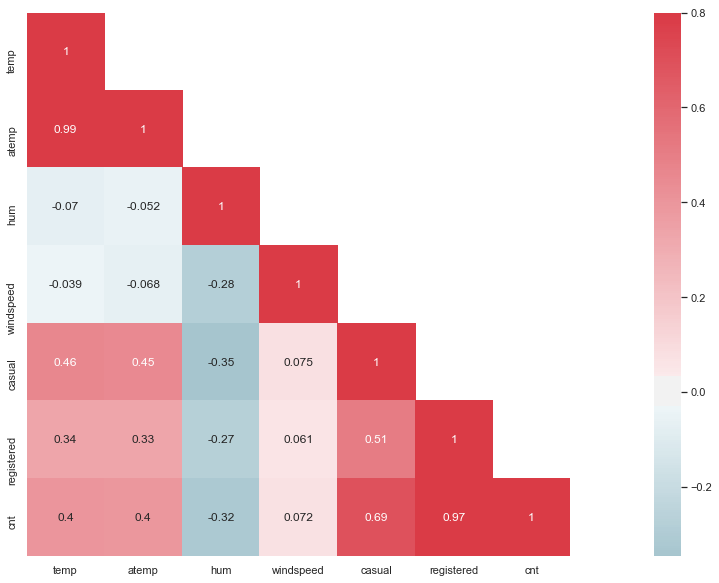

In [31]:
# Now, let's plot the correlations that we have calculated into a matrix for an easier understanding.

sns.set(style="white")
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)]= False


# Generate a colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask
sns.heatmap(corrMatt, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, annot=True)

After visualizing the correlation matrix we can see that "temp' and "humidity" have positive and negative correlation with count. Although neither of them present a big correlation eith count there is a little dependency.
The variables "atemp" and "temp" presents a strong correlation so we should not consider "atemp" as a relevant feature when building the model.
The variables "casual" and "registered should not be taken into account since they are leakage variables.
Finally, the variable "windspeed" is not a relevante feature for the modeling section and should not be consider.


In [7]:
df_hour = df_hour.drop(["atemp"], axis=1)

### EDA Conclusions
The main conclusions for this EDA analysis is that people tend to rent bike during summer season since it is more appealing. That explains why in the months of June, July and August occurs a higher demand for renting a bike that any other months.
During weekdays more people tend to rent the bikes at 7-8 am and at 5-6pm. Nevertheless, this patterns are not observed on weekends where the peah hour is from 10 pm to 4pm.

# 7. Feature Engineering: Part II

In [8]:
#feature engineering: enconde categorical variables
df_dummy=pd.get_dummies(df_hour)
df_dummy.head()

,dteday,temp,hum,windspeed,casual,registered,cnt,season_1,season_2,season_3,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
instant,,,,,,,,,,,,,,,,,,,,,
1,2011-01-01,0.24,0.81,0.0,3,13,16,1,0,0,...,0,0,0,1,1,0,1,0,0,0
2,2011-01-01,0.22,0.80,0.0,8,32,40,1,0,0,...,0,0,0,1,1,0,1,0,0,0
3,2011-01-01,0.22,0.80,0.0,5,27,32,1,0,0,...,0,0,0,1,1,0,1,0,0,0
4,2011-01-01,0.24,0.75,0.0,3,10,13,1,0,0,...,0,0,0,1,1,0,1,0,0,0
5,2011-01-01,0.24,0.75,0.0,0,1,1,1,0,0,...,0,0,0,1,1,0,1,0,0,0


In [9]:
# divide train and test set
df_train = df_dummy[df_dummy["dteday"] < "10/01/2012"]
df_test = df_dummy[df_dummy["dteday"] > "09/30/2012"]

In [10]:
X_train = df_train.drop(["dteday", "cnt","casual","registered"], axis=1)
y_train = df_train["cnt"]
X_test = df_test.drop(["dteday", "cnt","casual","registered"], axis=1)
y_test = df_test["cnt"]

### First let's try a Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm=LinearRegression()
lm.fit(X_train,y_train)
predictions=lm.predict(X_test)

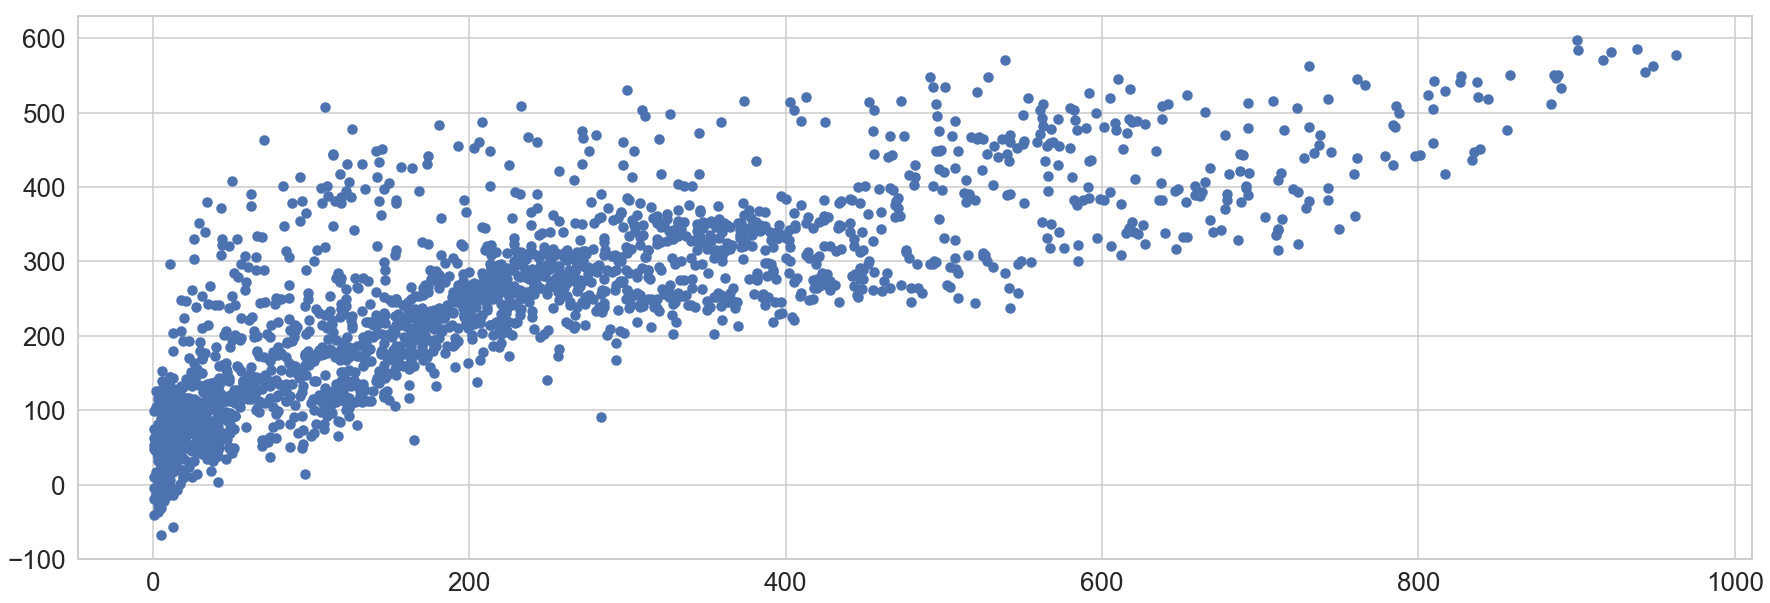

In [50]:
plt.scatter(y_test,predictions)

[Text(0.5,1,'real vs predicted distribution')]

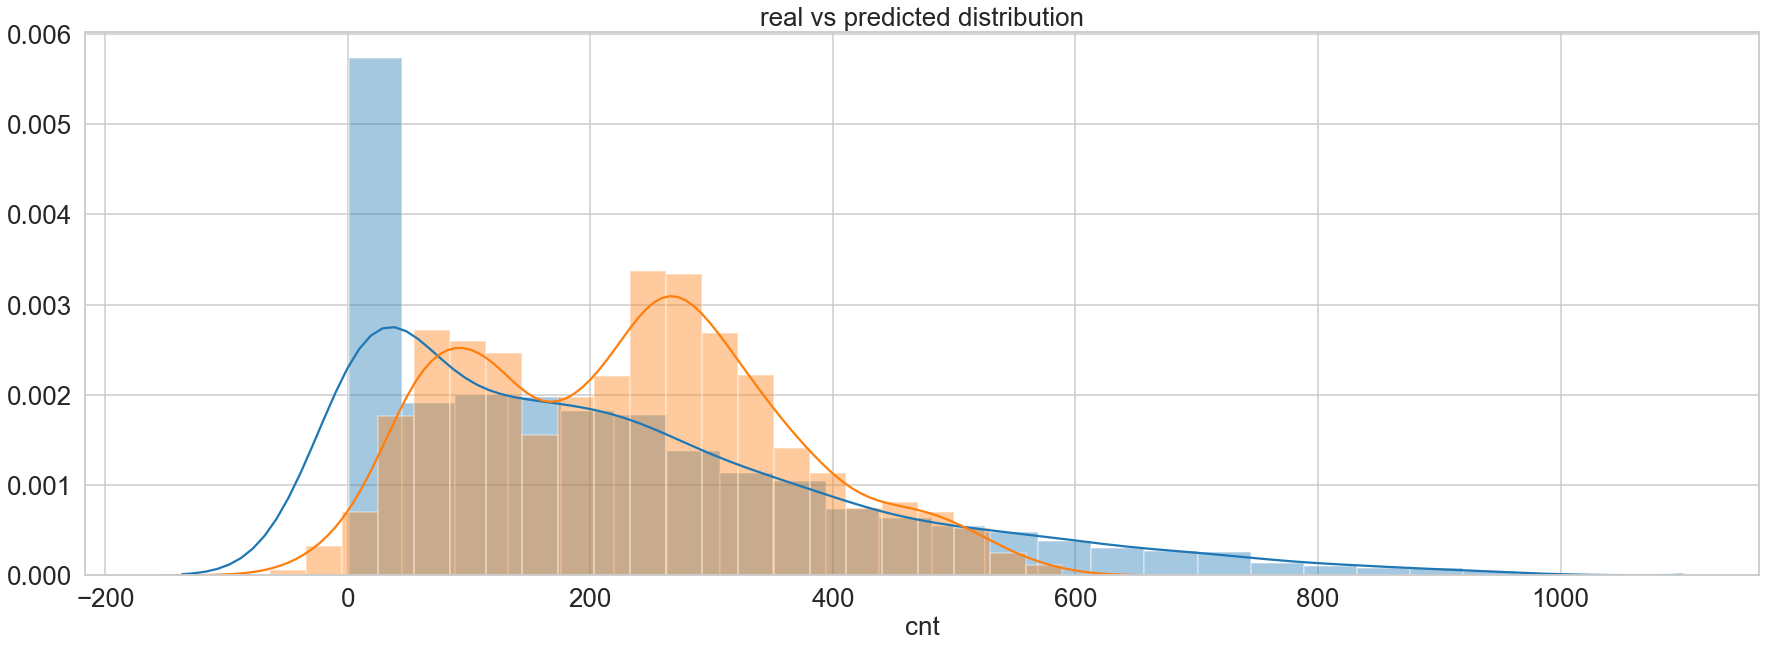

In [17]:
# real vs predicted distribution
fig, ax = plt.subplots()
sns.distplot(y_test)
sns.distplot(predictions)
ax.set(title="real vs predicted distribution")

In [20]:
from sklearn import metrics
print("R-square: ",metrics.r2_score(y_test,predictions))

R-square:  0.5969851588848172


### Now let's try a Decision Tree

R-square:  0.5935826185859002


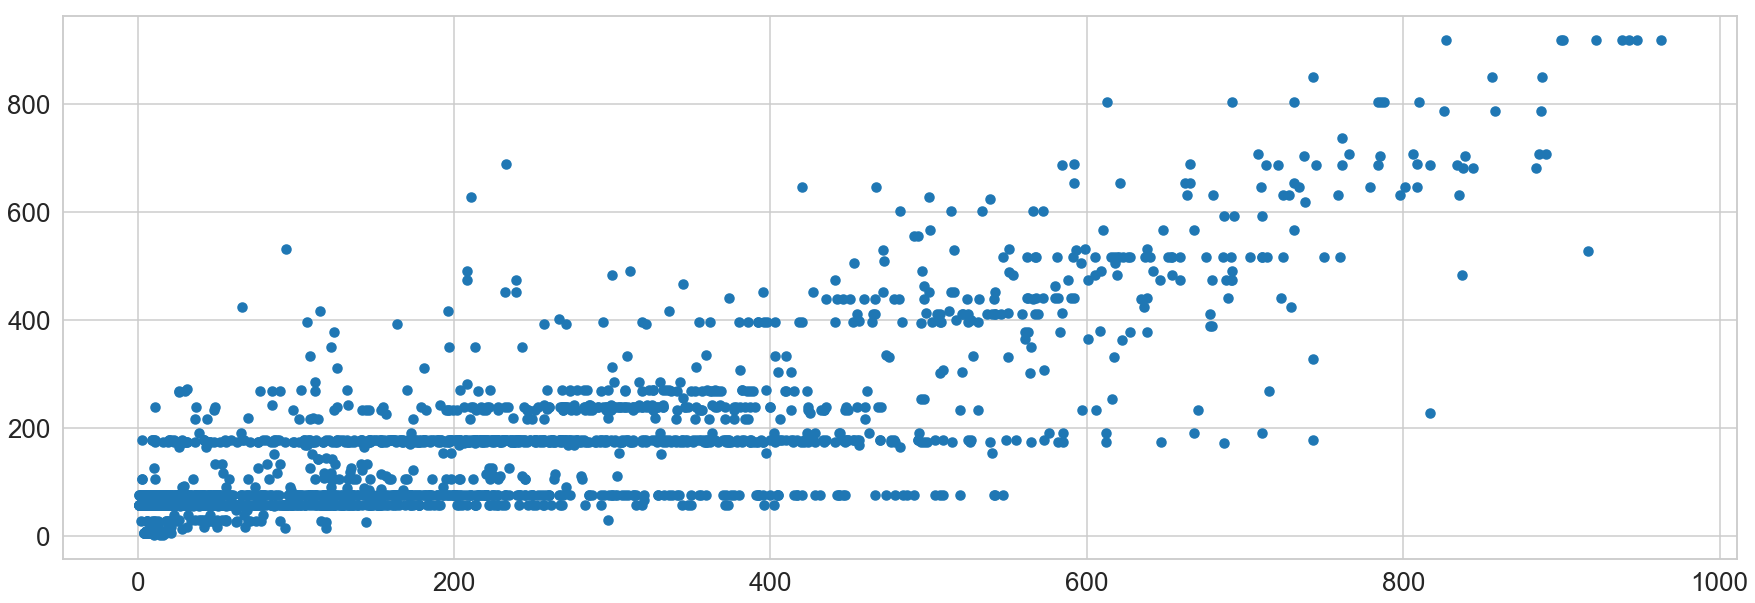

In [21]:
from sklearn.tree import DecisionTreeRegressor

dtm = DecisionTreeRegressor(max_depth=10)

dtm.fit(X_train,y_train)
predictions = dtm.predict(X_test)
plt.scatter(y_test,predictions)
print("R-square: ",metrics.r2_score(y_test,predictions))

In [94]:
#Hyperparameter tuning with GridSearchCV¶
from sklearn.model_selection import GridSearchCV,cross_val_score, cross_val_predict, train_test_split

param_grid = {"min_samples_split": range(10,500,20),
              "max_depth": range(1,20,2)              
             }

grid_cv_dtm = GridSearchCV(dtm, param_grid, cv=5)
grid_cv_dtm.fit(X_train,y_train)



GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'min_samples_split': range(10, 500, 20), 'max_depth': range(1, 20, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [95]:
best_parameters = grid_cv_dtm.best_params_
best_parameters

{'max_depth': 19, 'min_samples_split': 70}

R-square:  0.7129233183167984


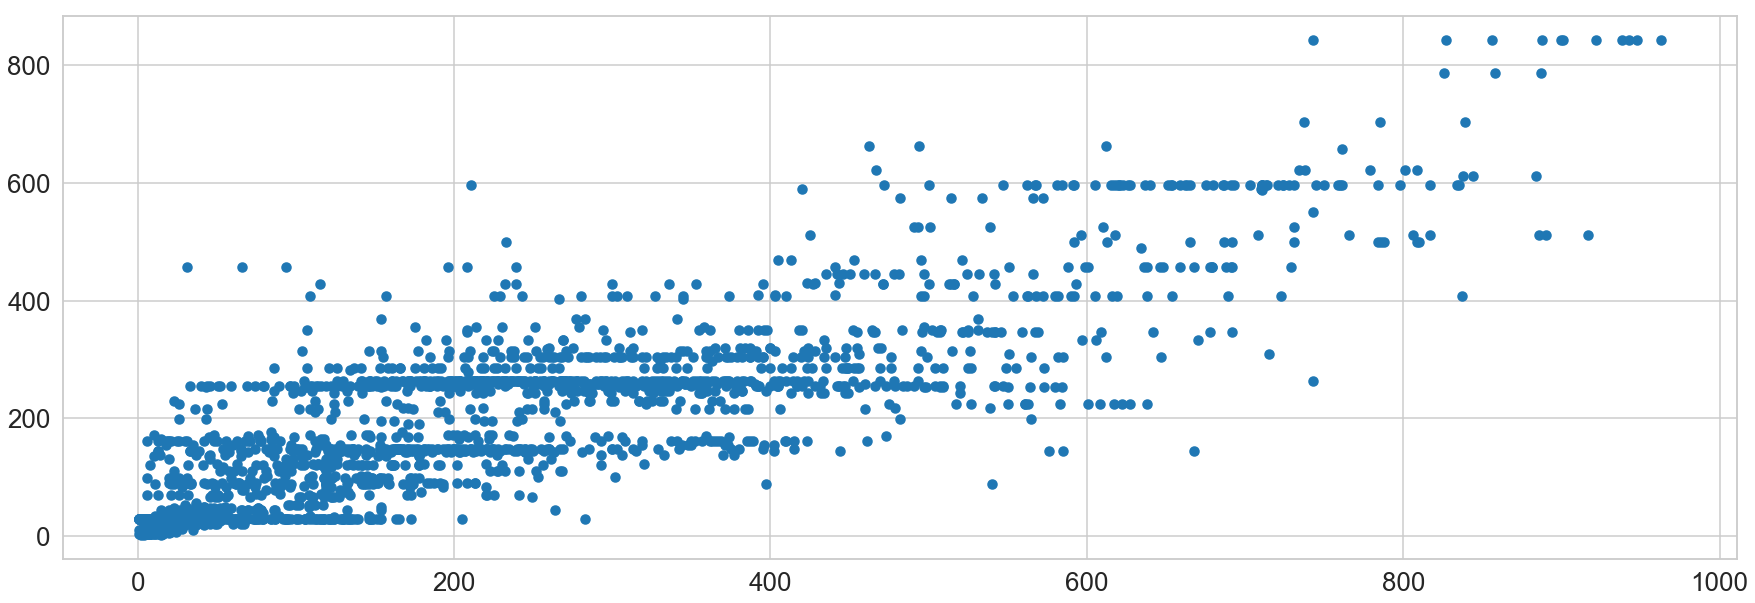

In [22]:
#using the best parameters found
dtm = DecisionTreeRegressor(max_depth=19, min_samples_split=70)
dtm.fit(X_train,y_train)
predictions=dtm.predict(X_test)
plt.scatter(y_test,predictions)
print("R-square: ",metrics.r2_score(y_test,predictions))

[Text(0.5,1,'real vs predicted distribution')]

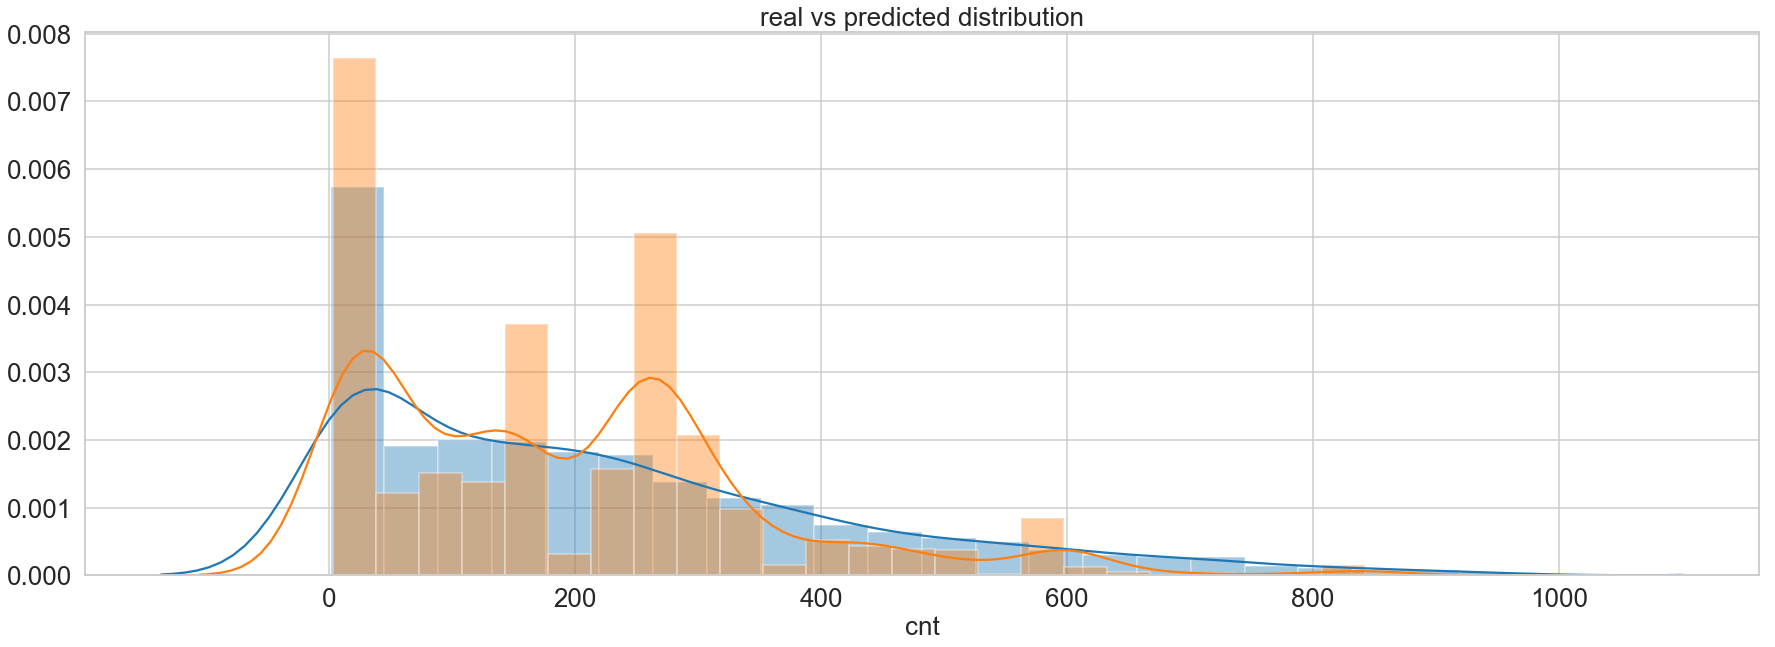

In [23]:
# real vs predicted distribution
fig, ax = plt.subplots()
sns.distplot(y_test)
sns.distplot(predictions)
ax.set(title="real vs predicted distribution")

### Trying a Random Forest Regression

R-square:  0.8192725667686638


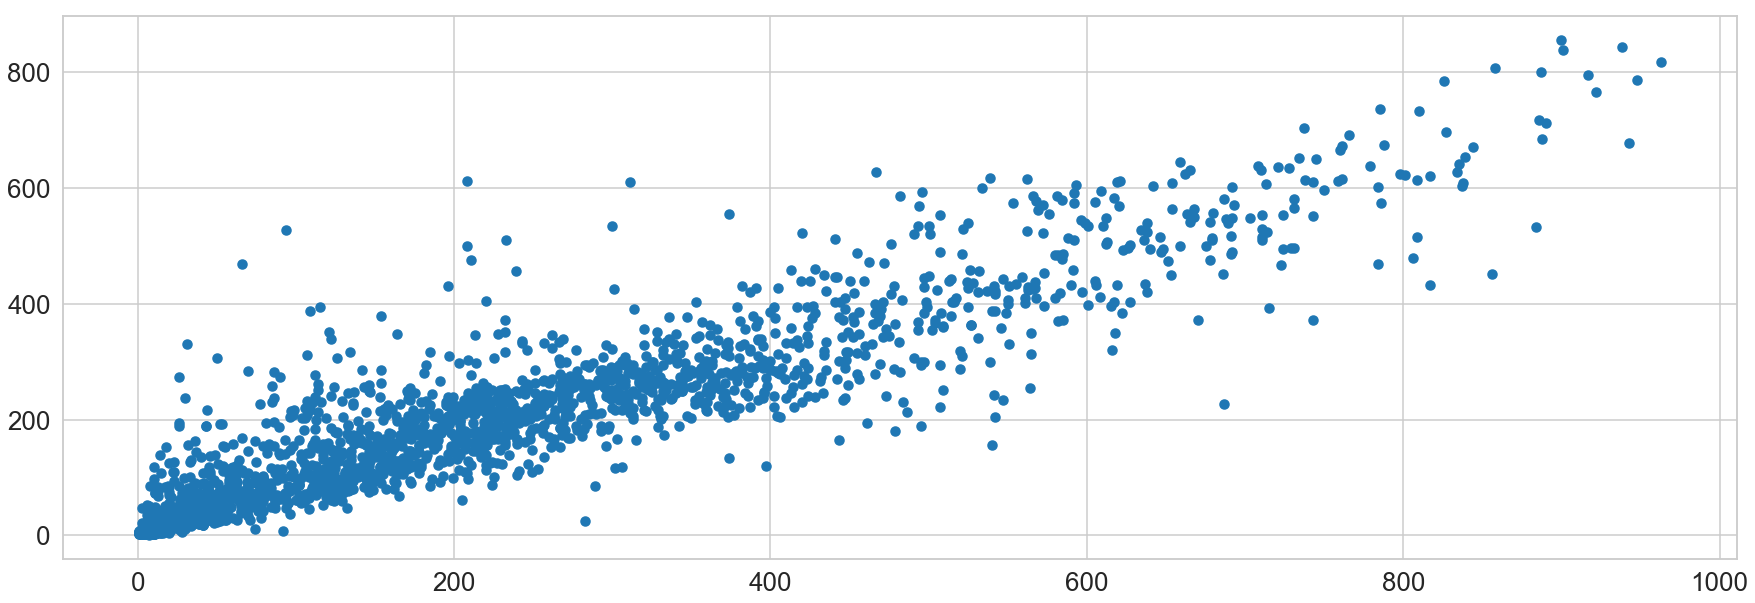

In [24]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train,y_train)
predictions=regressor.predict(X_test)
plt.scatter(y_test,predictions)
print("R-square: ",metrics.r2_score(y_test,predictions))

In [85]:
#tuning Hyperparameters
parameters = [{'n_estimators' : [150,200,250,300], 'max_features' : ['auto','sqrt','log2']}]
grid_search = GridSearchCV(estimator = regressor, param_grid = parameters)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_


In [86]:
best_parameters

{'max_features': 'auto', 'n_estimators': 300}

R-square:  0.8346683921992984


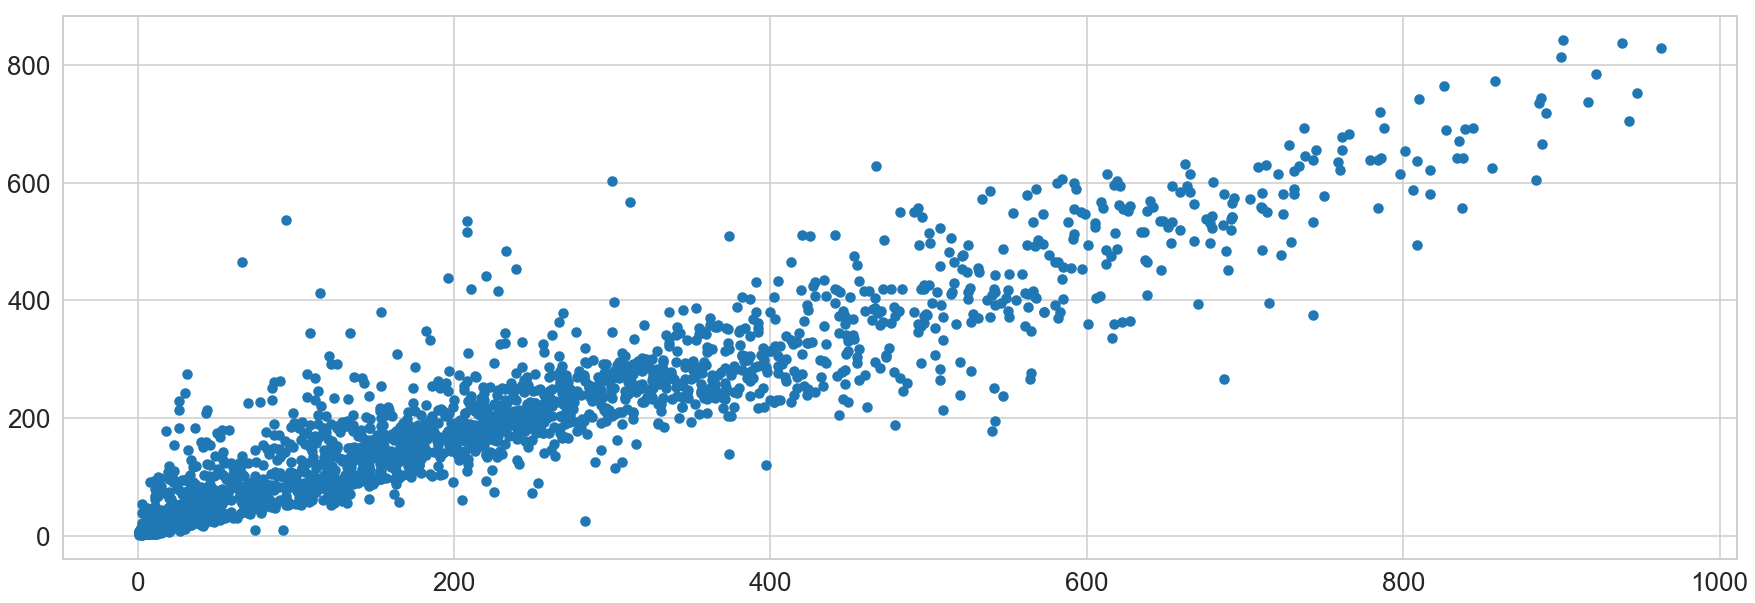

In [25]:
#using the best parameters found
regressor = RandomForestRegressor(n_estimators = 300, max_features = 'auto') 
regressor.fit(X_train,y_train)
predictions=regressor.predict(X_test)
plt.scatter(y_test,predictions)
print("R-square: ",metrics.r2_score(y_test,predictions))

[Text(0.5,1,'real vs predicted distribution')]

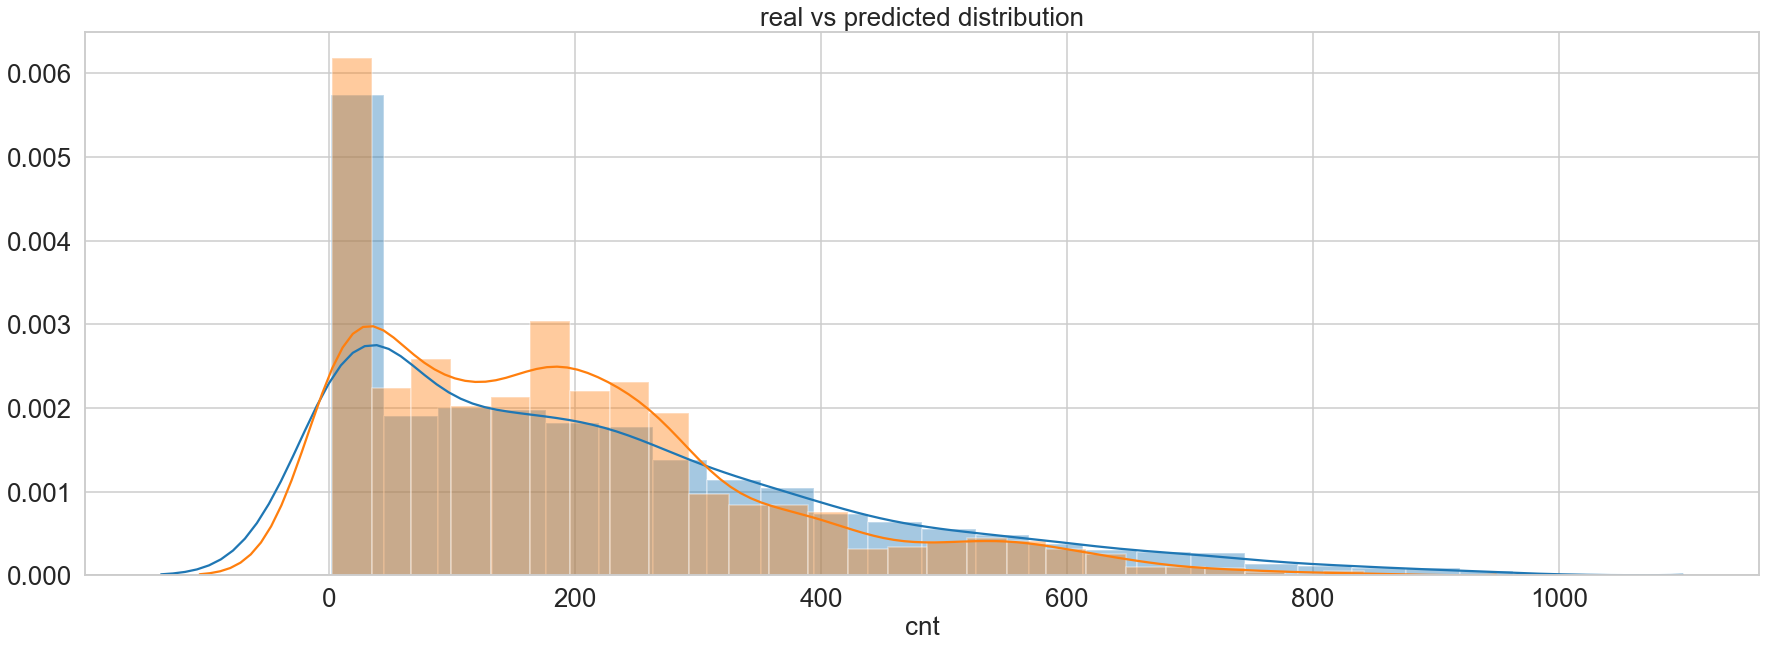

In [26]:
# real vs predicted distribution
fig, ax = plt.subplots()
sns.distplot(y_test)
sns.distplot(predictions)
ax.set(title="real vs predicted distribution")

### Finally, let's try a XGBoost

C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


R-square:  0.7763803484385218


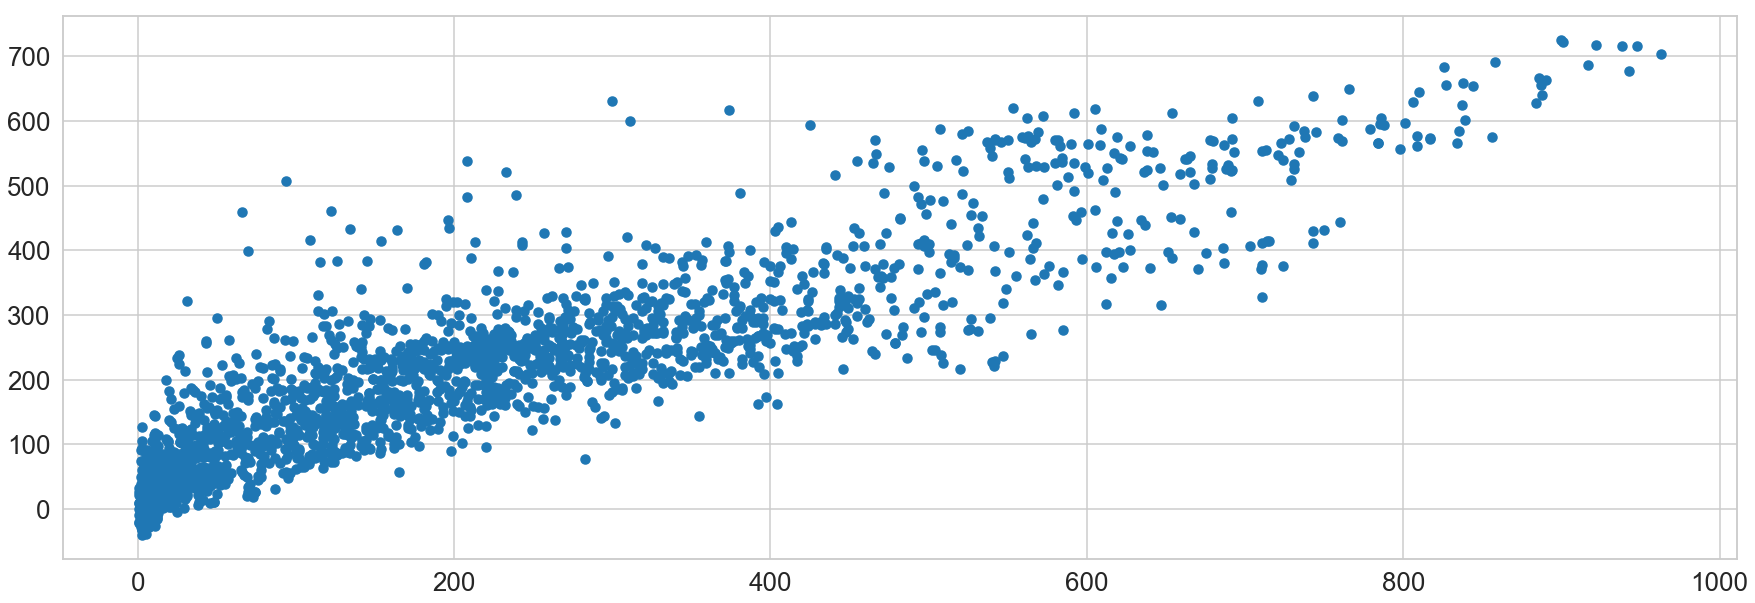

In [27]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42, colsample_bytree= 0.3,learning_rate= 0.1,
                max_depth= 5)
xgb_model.fit(X_train,y_train)
predictions=xgb_model.predict(X_test)
plt.scatter(y_test,predictions)
print("R-square: ",metrics.r2_score(y_test,predictions))

In [106]:
#tuning Hyperparameters
parameters = [{"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }]
grid_search = GridSearchCV(estimator = xgb_model, param_grid = parameters)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_parameters

C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


{'colsample_bytree': 0.5, 'learning_rate': 0.2, 'max_depth': 6}

C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\jalouzada\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


R-square:  0.8588419324086459


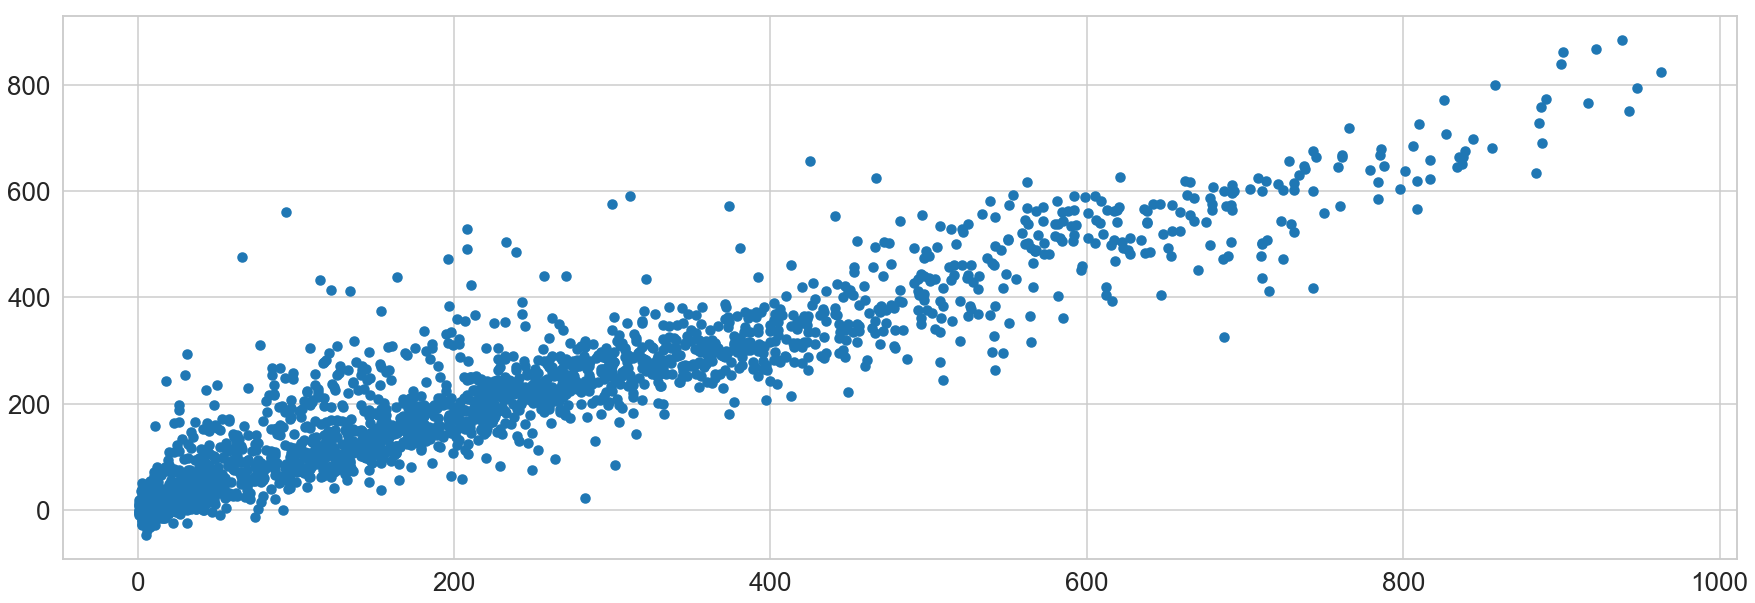

In [28]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42, colsample_bytree= 0.5,learning_rate= 0.2,
                max_depth= 6)
xgb_model.fit(X_train,y_train)
predictions=xgb_model.predict(X_test)
plt.scatter(y_test,predictions)
print("R-square: ",metrics.r2_score(y_test,predictions))

[Text(0.5,1,'real vs predicted distribution')]

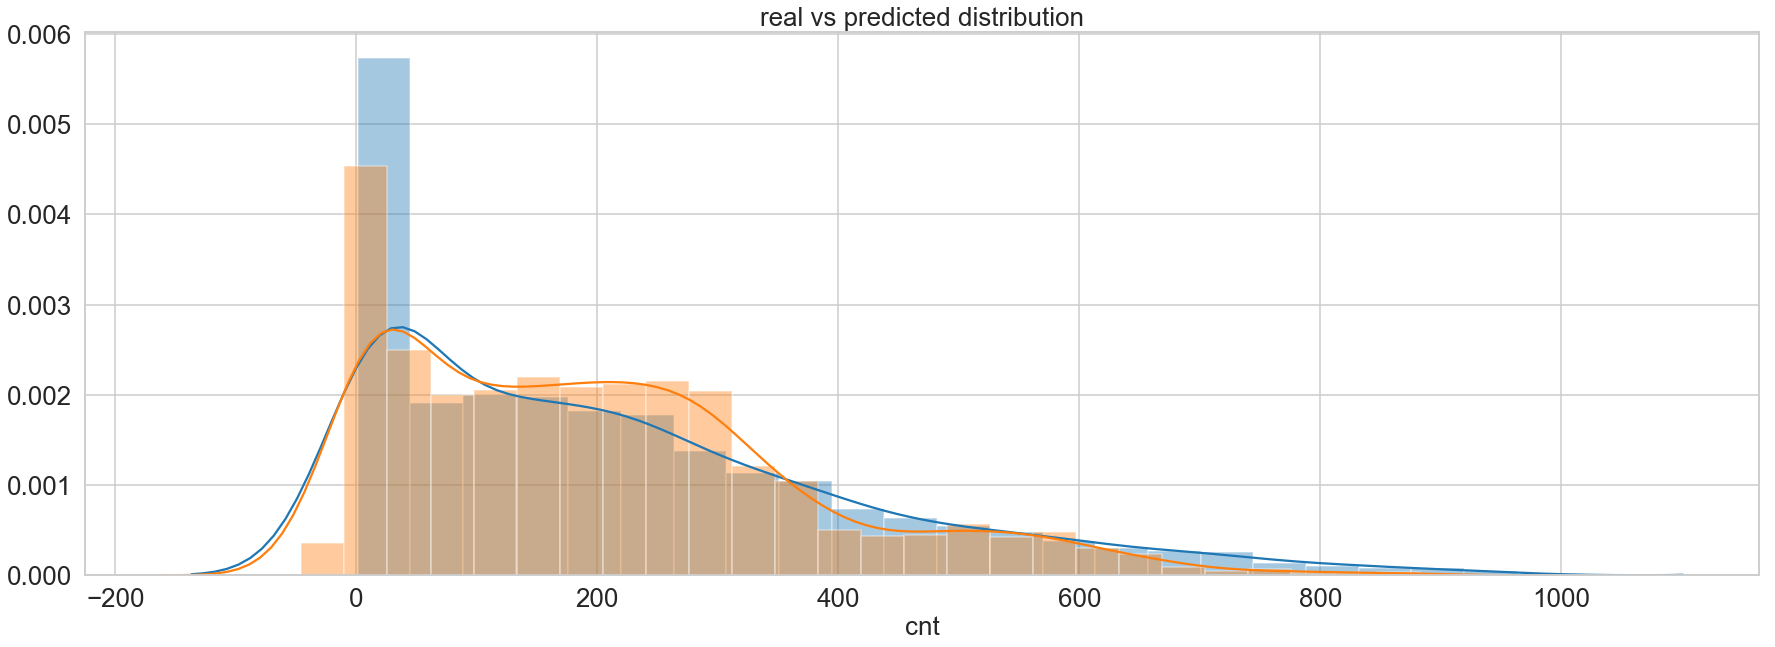

In [29]:
# real vs predicted distribution
fig, ax = plt.subplots()
sns.distplot(y_test)
sns.distplot(predictions)
ax.set(title="real vs predicted distribution")

From the 4 different models tested, XGBoost had the best performance, with an R-score of 0.867. Now let's explore more this model.

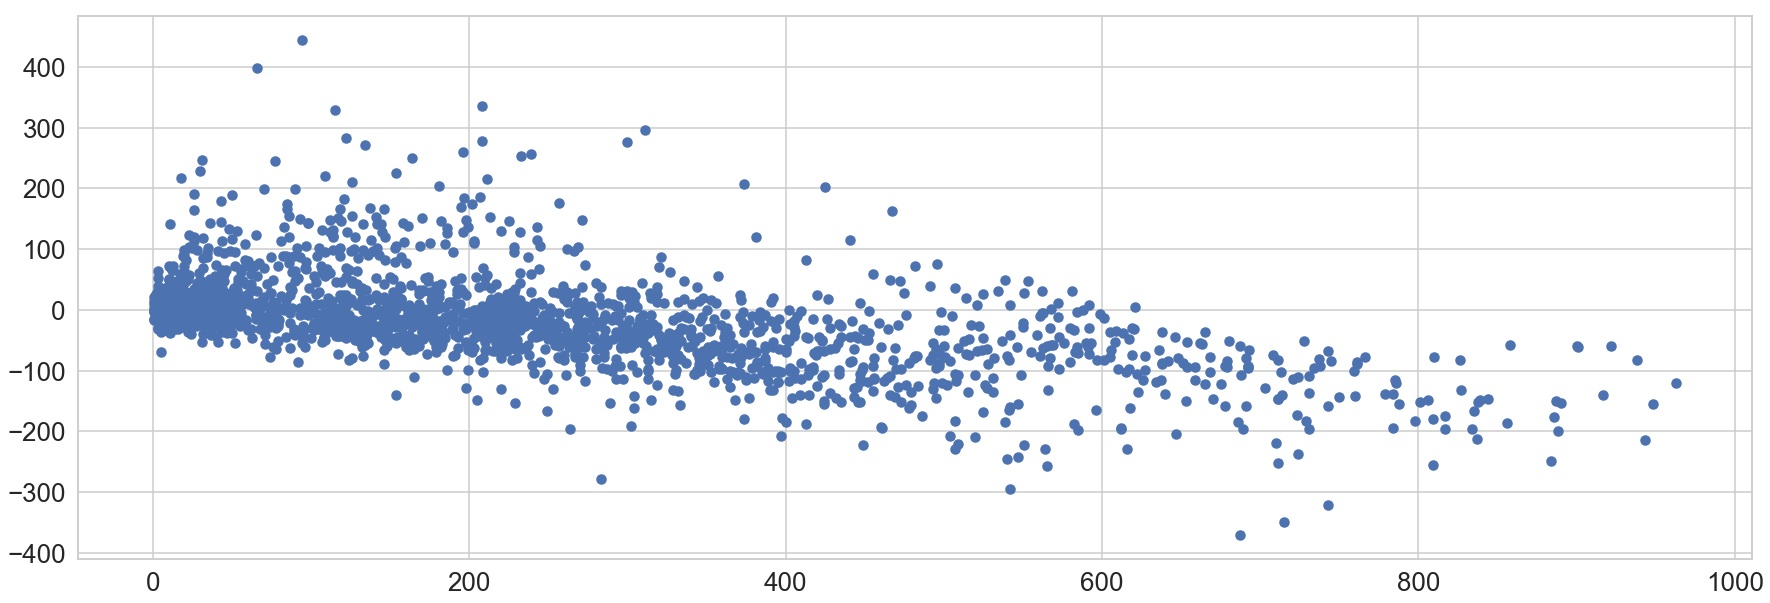

In [56]:
#Plot residuals
plt.scatter(y_test,predictions-y_test)


From the residuals plot above, we see that the model is best at predicting values below 400.

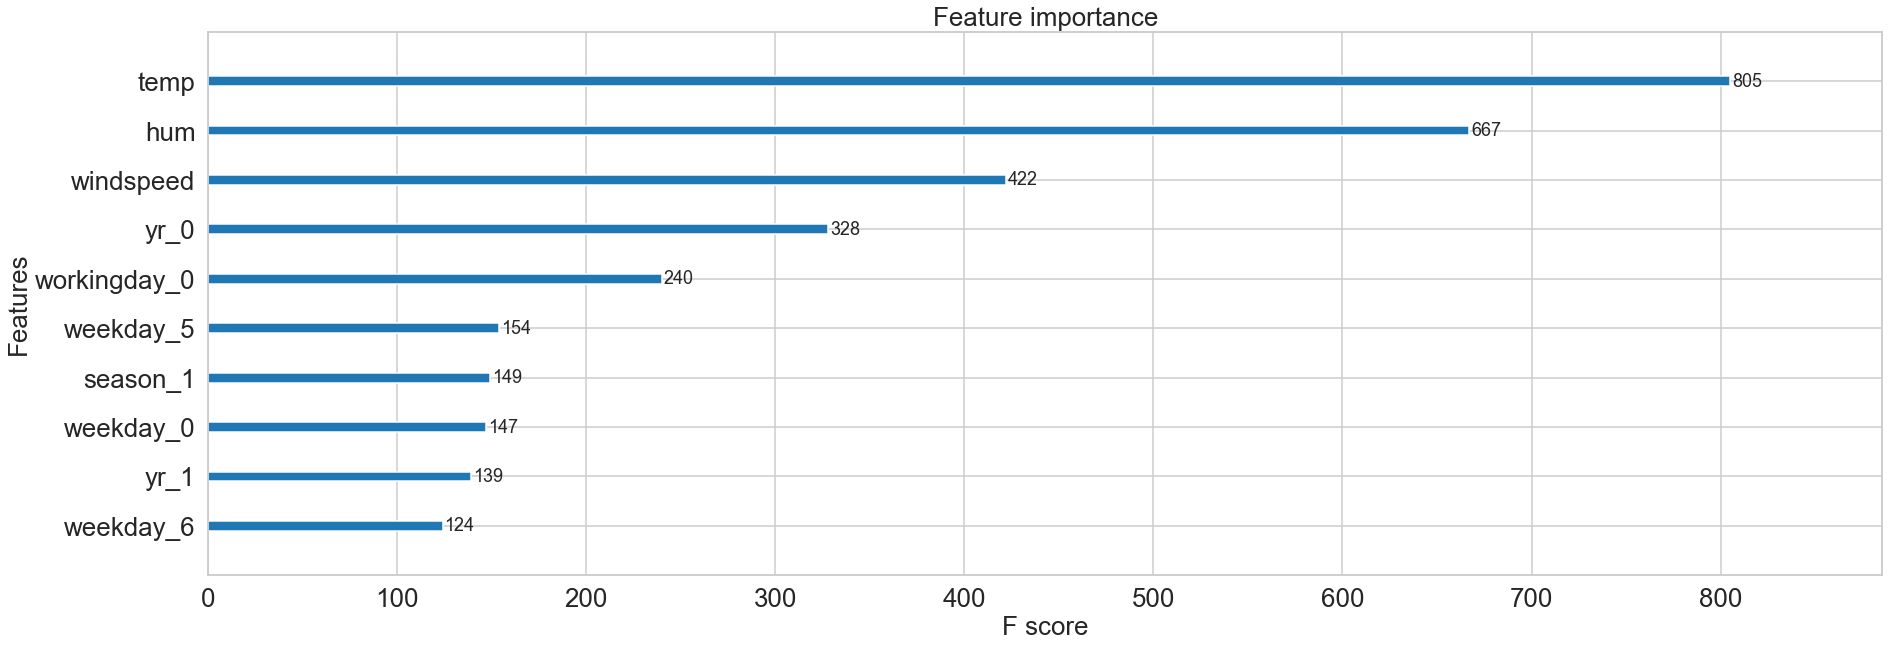

In [36]:
xgb.plot_importance(xgb_model, max_num_features=10)

The most important features for predicting demand are related to the weather (temperature, humidity and wind speed).

As a conclusion, it is worth to mention that using the XGBoost model we successfully predict the bike sharing rental count with relatively high accuracy. 
The XGboost model is the best performing one for our data with an R-score of 0.867. 